In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from scipy.stats import pearsonr, chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [16]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (matplotlib)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [17]:
print("="*60)
print("‚ñ∂ Í∏àÏúµÏÉÅÌíà Ï∂îÏ≤ú Î™®Îç∏ÎßÅ - Îç∞Ïù¥ÌÑ∞ Î∞è Î≥ÄÏàò ÏÑ§Ï†ï")
print("="*60)

# ==========================================
# 1Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ Î°úÎìú
# ==========================================
print("\n1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ï§ë...")

try:
    # CSV ÌååÏùº ÏùΩÍ∏∞
    original_df = pd.read_csv('data/SCFP2022_ÌïúÍ∏Ä.csv')
    print(f"‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏÑ±Í≥µ: {original_df.shape}")
    print(f"   - Ìñâ Ïàò: {original_df.shape[0]:,}")
    print(f"   - Ïó¥ Ïàò: {original_df.shape[1]:,}")
    
    # Ïª¨ÎüºÎ™Ö ÌôïÏù∏
    print(f"\nüìã Ïª¨ÎüºÎ™Ö ÎØ∏Î¶¨Î≥¥Í∏∞ (Ï≤òÏùå 10Í∞ú):")
    for i, col in enumerate(original_df.columns[:10]):
        print(f"   {i+1:2d}. {col}")
    
except FileNotFoundError:
    print("‚ùå ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÌååÏùºÎ™ÖÍ≥º Í≤ΩÎ°úÎ•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    original_df = None

‚ñ∂ Í∏àÏúµÏÉÅÌíà Ï∂îÏ≤ú Î™®Îç∏ÎßÅ - Îç∞Ïù¥ÌÑ∞ Î∞è Î≥ÄÏàò ÏÑ§Ï†ï

1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ï§ë...
‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏÑ±Í≥µ: (22975, 357)
   - Ìñâ Ïàò: 22,975
   - Ïó¥ Ïàò: 357

üìã Ïª¨ÎüºÎ™Ö ÎØ∏Î¶¨Î≥¥Í∏∞ (Ï≤òÏùå 10Í∞ú):
    1. Ïó∞ÎèÑ
    2. Ïó∞ÎèÑÏΩîÎìú
    3. Í∞ÄÏ§ëÏπò
    4. Í∞ÄÍµ¨Ï£ºÏÑ±Î≥Ñ
    5. Ïó∞Î†π
    6. Ïó∞Î†πÎåÄÎ∂ÑÎ•ò
    7. ÍµêÏú°ÏàòÏ§Ä
    8. ÍµêÏú°ÏàòÏ§ÄÎ∂ÑÎ•ò
    9. Í≤∞ÌòºÏÉÅÌÉú
   10. ÏûêÎÖÄÏàò


In [18]:
# ==========================================
# 2Îã®Í≥Ñ: Ï¢ÖÏÜçÎ≥ÄÏàò Ï†ïÏùò
# ==========================================
print("\n" + "="*60)
print("2. Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ§Ï†ï")
print("="*60)

# Ïã§Ï†ú Í∏àÏï° Ïª¨ÎüºÎ™ÖÏóê ÎßûÏ∂∞ Ï¢ÖÏÜçÎ≥ÄÏàò Îß§Ìïë (Í∏àÏï° ‚Üí Î≥¥Ïú†Ïó¨Î∂Ä Î≥ÄÌôò)
target_mapping = {
    'LIQ': 'Ïú†ÎèôÏÑ±ÏûêÏÇ∞',           # Ïú†ÎèôÏÑ±ÏûêÏÇ∞ Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1(Î≥¥Ïú†), ÏïÑÎãàÎ©¥ 0(ÎØ∏Î≥¥Ïú†)
    'CDS': 'ÏñëÎèÑÏÑ±ÏòàÍ∏àÏ¶ùÏÑú',        # ÏñëÎèÑÏÑ±ÏòàÍ∏àÏ¶ùÏÑú Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1(Î≥¥Ïú†), ÏïÑÎãàÎ©¥ 0(ÎØ∏Î≥¥Ïú†)  
    'NMMF': 'ÎπÑÎ®∏ÎãàÎßàÏºìÌéÄÎìú',      # ÎπÑÎ®∏ÎãàÎßàÏºìÌéÄÎìú Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1(Î≥¥Ïú†), ÏïÑÎãàÎ©¥ 0(ÎØ∏Î≥¥Ïú†)
    'STOCKS': 'Ï£ºÏãùÎ≥¥Ïú†',          # Ï£ºÏãù Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1(Î≥¥Ïú†), ÏïÑÎãàÎ©¥ 0(ÎØ∏Î≥¥Ïú†)
    'RETQLIQ': 'Ìá¥ÏßÅÏ§ÄÎπÑÍ∏àÏú†ÎèôÏÑ±'   # Ìá¥ÏßÅÏ§ÄÎπÑÍ∏àÏú†ÎèôÏÑ± Í∏àÏï°Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1(Î≥¥Ïú†), ÏïÑÎãàÎ©¥ 0(ÎØ∏Î≥¥Ïú†)
}

targets = list(target_mapping.keys())
print(f"üéØ Ï¢ÖÏÜçÎ≥ÄÏàò: {targets}")


2. Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ§Ï†ï
üéØ Ï¢ÖÏÜçÎ≥ÄÏàò: ['LIQ', 'CDS', 'NMMF', 'STOCKS', 'RETQLIQ']


In [19]:
# ==========================================
# 3Îã®Í≥Ñ: ÎèÖÎ¶ΩÎ≥ÄÏàò Ï†ïÏùò (Ìö®Ïú®Ï†Å Î∂ÑÎ•ò)
# ==========================================
print("\n" + "="*60)
print("3. ÎèÖÎ¶ΩÎ≥ÄÏàò ÏÑ§Ï†ï")
print("="*60)

# ÌïµÏã¨ Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò (12Í∞ú)
demographic_features = [
    # Í∏∞Î≥∏ Ïù∏Íµ¨ÌÜµÍ≥Ñ (5Í∞ú)
    'Ïó∞Î†π',           # Ìà¨ÏûêÏÑ±Ìñ•Ïùò ÌïµÏã¨ Í≤∞Ï†ïÏöîÏù∏
    'Í∞ÄÍµ¨Ï£ºÏÑ±Î≥Ñ',      # Ìà¨Ïûê Ìå®ÌÑ¥ Ï∞®Ïù¥
    'ÍµêÏú°ÏàòÏ§Ä',       # Í∏àÏúµÏßÄÏãùÍ≥º ÏßÅÍ≤∞
    'Í≤∞ÌòºÏÉÅÌÉú',       # Í∞ÄÍ≥Ñ ÏùòÏÇ¨Í≤∞Ï†ï Íµ¨Ï°∞
    'ÏûêÎÖÄÏàò',         # ÎØ∏Îûò Ïû¨Ï†ïÍ≥ÑÌöç ÏòÅÌñ•
    
    # ÏßÅÏóÖ/Í≥†Ïö© (3Í∞ú)
    'ÏßÅÏóÖÎ∂ÑÎ•ò1',      # ÏÜåÎìù ÏïàÏ†ïÏÑ±
    'ÎÖ∏ÎèôÎ†•Ï∞∏Ïó¨ÏÉÅÌÉú',  # Í≥†Ïö© ÏÉÅÌÉú
    'ÏÇ∞ÏóÖÎ∂ÑÎ•ò',       # ÏóÖÏ¢ÖÎ≥Ñ ÌäπÏÑ±
    
    # ÏÇ¨ÌöåÍ≤ΩÏ†úÏ†Å Î∞∞Í≤Ω (2Í∞ú)
    'Ïù∏Ï¢ÖÎ∂ÑÎ•ò',       # ÏÇ¨ÌöåÍ≤ΩÏ†úÏ†Å Î∞∞Í≤Ω
    'ÏÉùÏï†Ï£ºÍ∏∞Î∂ÑÎ•ò',    # ÏÉùÏï†Îã®Í≥ÑÎ≥Ñ Í∏àÏúµÎãàÏ¶à
    
    # Í∏àÏúµ ÌñâÎèô/ÏÑ±Ìñ• (2Í∞ú)
    'Í∏àÏúµÏúÑÌóòÍ∞êÏàò',    # Ìà¨Ïûê ÏúÑÌóòÏÑ†Ìò∏ÎèÑ (ÌïµÏã¨!)
    'Ï†ÄÏ∂ïÏó¨Î∂Ä'        # Ï†ÄÏ∂ï ÌñâÌÉú
]

# ÌïµÏã¨ Í∏àÏúµ Î≥ÄÏàò (15Í∞ú)
financial_features = [
    # ÏÜåÎìù Í¥ÄÎ†® (4Í∞ú)
    'Ï¥ùÏÜåÎìù',         # Ìà¨ÏûêÍ∑úÎ™® Í≤∞Ï†ïÏùò Í∏∞Î≥∏
    'Í∏âÏó¨ÏÜåÎìù',       # ÏïàÏ†ïÏÜåÎìù
    'ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù',    # Î≥ÄÎèôÏÜåÎìù
    'Ï†ïÏÉÅÏÜåÎìù',       # ÏÜåÎìù ÏïàÏ†ïÏÑ±
    
    # ÏûêÏÇ∞ Í∑úÎ™® (4Í∞ú)
    'ÏàúÏûêÏÇ∞',         # Ï†ÑÏ≤¥ Ïû¨Ï†ïÏÉÅÌô© (ÌïµÏã¨!)
    'Ï¥ùÍ∏àÏúµÏûêÏÇ∞',      # Ìà¨ÏûêÍ∞ÄÎä• ÏûêÍ∏à
    'Ï¥ùÎπÑÍ∏àÏúµÏûêÏÇ∞',    # Î∂ÄÎèôÏÇ∞ Îì± Ïã§Î¨ºÏûêÏÇ∞
    'Ï£ºÌÉùÎ≥¥Ïú†',       # Ï£ºÏöî Ïã§Î¨ºÏûêÏÇ∞
    
    # Í∏∞Ï°¥ Ìà¨Ïûê ÌòÑÌô© (4Í∞ú) - Ï¢ÖÏÜçÎ≥ÄÏàòÏôÄ Í≤πÏπòÏßÄ ÏïäÎäî Í≤ÉÎì§
    'Ï£ºÏãùÎ≥¥Ïú†',       # Ï£ºÏãù Ìà¨Ïûê Í≤ΩÌóò
    'ÌòÑÍ∏àÍ∞ÄÏπòÏÉùÎ™ÖÎ≥¥Ìóò', # Î≥¥ÌóòÏÑ± Í∏àÏúµÏÉÅÌíà
    'Ìá¥ÏßÅÏûêÎ≥∏',       # Ìá¥ÏßÅÏó∞Í∏à ÏûêÏÇ∞
    'IRAÍ≥ÑÏ¢åÎ≥¥Ïú†Ïó¨Î∂Ä', # Í∞úÏù∏Ïó∞Í∏à Î≥¥Ïú†
    
    # Ìà¨Ïûê ÏÑ±Ìñ•/Í≤ΩÌóò (3Í∞ú)
    'Ï§ëÍ∞úÍ≥ÑÏ¢åÎ≥¥Ïú†Ïó¨Î∂Ä', # Ìà¨Ïûê ÌôúÎèôÏÑ±
    'Í±∞ÎûòÌôúÎèôÏó¨Î∂Ä',    # Ï†ÅÍ∑πÏ†Å Ìà¨Ïûê Ïó¨Î∂Ä
    'Í∏àÏúµÏßÄÏãù'        # Í∏àÏúµÏÉÅÌíà Ïù¥Ìï¥ÎèÑ
]

print(f"üë• Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò: {len(demographic_features)}Í∞ú")
print(f"üí∞ Í∏àÏúµ Î≥ÄÏàò: {len(financial_features)}Í∞ú")
print(f"üìä Ï¥ù ÎèÖÎ¶ΩÎ≥ÄÏàò: {len(demographic_features) + len(financial_features)}Í∞ú")



3. ÎèÖÎ¶ΩÎ≥ÄÏàò ÏÑ§Ï†ï
üë• Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò: 12Í∞ú
üí∞ Í∏àÏúµ Î≥ÄÏàò: 15Í∞ú
üìä Ï¥ù ÎèÖÎ¶ΩÎ≥ÄÏàò: 27Í∞ú


In [20]:
# ==========================================
# 4Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î∂ÑÌï† Î∞è Ï¢ÖÏÜçÎ≥ÄÏàò ÏÉùÏÑ±
# ==========================================
print("\n" + "="*60)
print("4. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Î∞è Ï¢ÖÏÜçÎ≥ÄÏàò ÏÉùÏÑ±")
print("="*60)

if original_df is not None:
    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥µÏÇ¨
    df_demographic = original_df.copy()
    df_financial = original_df.copy()
    
    # Ï¢ÖÏÜçÎ≥ÄÏàò ÏÉùÏÑ± (Í∏àÏï° Í∏∞Î∞ò ‚Üí Î≥¥Ïú† Ïó¨Î∂Ä Ïù¥ÏßÑ Î∂ÑÎ•ò Î≥ÄÌôò)
    print("üîÑ Ï¢ÖÏÜçÎ≥ÄÏàò ÏÉùÏÑ± Ï§ë (Í∏àÏï° ‚Üí Î≥¥Ïú†Ïó¨Î∂Ä Î≥ÄÌôò)...")
    for target, amount_col in target_mapping.items():
        if amount_col in original_df.columns:
            # ÌïµÏã¨: Í∏àÏï°Ïù¥ 0Î≥¥Îã§ ÌÅ¨Î©¥ 1(Î≥¥Ïú†), ÏïÑÎãàÎ©¥ 0(ÎØ∏Î≥¥Ïú†)Î°ú Î≥ÄÌôò
            df_financial[target] = (original_df[amount_col] > 0).astype(int)
            df_demographic[target] = (original_df[amount_col] > 0).astype(int)
            
            # Î≥¥Ïú†Ïú® Î∞è ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï ÌôïÏù∏
            holding_rate = df_financial[target].mean()
            total_holders = df_financial[target].sum()
            total_non_holders = len(df_financial) - total_holders
            avg_amount = original_df[original_df[amount_col] > 0][amount_col].mean()
            
            # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï ÎπÑÏú® Í≥ÑÏÇ∞
            if holding_rate > 0:
                imbalance_ratio = (1 - holding_rate) / holding_rate  # ÎØ∏Î≥¥Ïú†:Î≥¥Ïú† ÎπÑÏú®
            else:
                imbalance_ratio = float('inf')
            
            print(f"   ‚úÖ {target} ({amount_col}):")
            print(f"      - Î≥¥Ïú†Ïú®: {holding_rate*100:.1f}% ({total_holders:,}Î™Ö)")
            print(f"      - ÎØ∏Î≥¥Ïú†Ïú®: {(1-holding_rate)*100:.1f}% ({total_non_holders:,}Î™Ö)")
            print(f"      - ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï ÎπÑÏú®: {imbalance_ratio:.2f}:1 (ÎØ∏Î≥¥Ïú†:Î≥¥Ïú†)")
            print(f"      - Î≥¥Ïú†Ïûê ÌèâÍ∑† Í∏àÏï°: ${avg_amount:,.0f}" if not pd.isna(avg_amount) else "      - Î≥¥Ïú†Ïûê ÌèâÍ∑† Í∏àÏï°: Í≥ÑÏÇ∞ Î∂àÍ∞Ä")
            
            # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Í≤ΩÍ≥†
            if imbalance_ratio > 4:  # 4:1 Ïù¥ÏÉÅ Î∂àÍ∑†Ìòï
                print(f"      ‚ö†Ô∏è  Ïã¨Í∞ÅÌïú ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï! ÏÉòÌîåÎßÅ Í∏∞Î≤ï ÌïÑÏöî")
            elif imbalance_ratio > 2:  # 2:1 Ïù¥ÏÉÅ Î∂àÍ∑†Ìòï
                print(f"      ‚ö° ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï ÏûàÏùå. Í∞ÄÏ§ëÏπò Ï°∞Ï†ï Í≥†Î†§")
        else:
            print(f"   ‚ùå {amount_col} Ïª¨ÎüºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")


4. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Î∞è Ï¢ÖÏÜçÎ≥ÄÏàò ÏÉùÏÑ±
üîÑ Ï¢ÖÏÜçÎ≥ÄÏàò ÏÉùÏÑ± Ï§ë (Í∏àÏï° ‚Üí Î≥¥Ïú†Ïó¨Î∂Ä Î≥ÄÌôò)...
   ‚úÖ LIQ (Ïú†ÎèôÏÑ±ÏûêÏÇ∞):
      - Î≥¥Ïú†Ïú®: 98.5% (22,637Î™Ö)
      - ÎØ∏Î≥¥Ïú†Ïú®: 1.5% (338Î™Ö)
      - ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï ÎπÑÏú®: 0.01:1 (ÎØ∏Î≥¥Ïú†:Î≥¥Ïú†)
      - Î≥¥Ïú†Ïûê ÌèâÍ∑† Í∏àÏï°: $777,054
   ‚úÖ CDS (ÏñëÎèÑÏÑ±ÏòàÍ∏àÏ¶ùÏÑú):
      - Î≥¥Ïú†Ïú®: 7.8% (1,792Î™Ö)
      - ÎØ∏Î≥¥Ïú†Ïú®: 92.2% (21,183Î™Ö)
      - ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï ÎπÑÏú®: 11.82:1 (ÎØ∏Î≥¥Ïú†:Î≥¥Ïú†)
      - Î≥¥Ïú†Ïûê ÌèâÍ∑† Í∏àÏï°: $1,382,777
      ‚ö†Ô∏è  Ïã¨Í∞ÅÌïú ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï! ÏÉòÌîåÎßÅ Í∏∞Î≤ï ÌïÑÏöî
   ‚úÖ NMMF (ÎπÑÎ®∏ÎãàÎßàÏºìÌéÄÎìú):
      - Î≥¥Ïú†Ïú®: 20.0% (4,604Î™Ö)
      - ÎØ∏Î≥¥Ïú†Ïú®: 80.0% (18,371Î™Ö)
      - ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï ÎπÑÏú®: 3.99:1 (ÎØ∏Î≥¥Ïú†:Î≥¥Ïú†)
      - Î≥¥Ïú†Ïûê ÌèâÍ∑† Í∏àÏï°: $9,779,335
      ‚ö° ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï ÏûàÏùå. Í∞ÄÏ§ëÏπò Ï°∞Ï†ï Í≥†Î†§
   ‚úÖ STOCKS (Ï£ºÏãùÎ≥¥Ïú†):
      - Î≥¥Ïú†Ïú®: 29.1% (6,689Î™Ö)
      - ÎØ∏Î≥¥Ïú†Ïú®: 70.9% (16,286Î™Ö)
      - Ì

In [21]:
# ==========================================
# 5Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï≤¥ÌÅ¨
# ==========================================
print("\n" + "="*60)
print("5. Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï≤¥ÌÅ¨")
print("="*60)

if original_df is not None:
    print(f"üìä Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥:")
    print(f"   - Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_financial.shape}")
    print(f"   - ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_demographic.shape}")
    print(f"   - Ï¢ÖÏÜçÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: {[col for col in targets if col in df_financial.columns]}")
    
    # Î≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏
    financial_exists = [col for col in financial_features if col in df_financial.columns]
    demographic_exists = [col for col in demographic_features if col in df_demographic.columns]
    
    print(f"   - Í∏àÏúµ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨: {len(financial_exists)}/{len(financial_features)}Í∞ú")
    print(f"   - Ïù∏Íµ¨ÌÜµÍ≥Ñ ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨: {len(demographic_exists)}/{len(demographic_features)}Í∞ú")
    
    # Í≤∞Ï∏°Í∞í ÌôïÏù∏
    print(f"\nüîç Í≤∞Ï∏°Í∞í Ï≤¥ÌÅ¨:")
    
    # Í∏àÏúµ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í
    if financial_exists:
        financial_missing = df_financial[financial_exists + [t for t in targets if t in df_financial.columns]].isnull().sum()
        if financial_missing.sum() > 0:
            print(f"   ‚ö†Ô∏è Í∏àÏúµ Í¥ÄÎ†® Í≤∞Ï∏°Í∞í:")
            for col, missing in financial_missing[financial_missing > 0].items():
                print(f"      - {col}: {missing:,}Í∞ú ({missing/len(df_financial)*100:.1f}%)")
        else:
            print("   ‚úÖ Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°Í∞í ÏóÜÏùå")
    
    # Ïù∏Íµ¨ÌÜµÍ≥Ñ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í
    if demographic_exists:
        demographic_missing = df_demographic[demographic_exists + [t for t in targets if t in df_demographic.columns]].isnull().sum()
        if demographic_missing.sum() > 0:
            print(f"   ‚ö†Ô∏è Ïù∏Íµ¨ÌÜµÍ≥Ñ Í¥ÄÎ†® Í≤∞Ï∏°Í∞í:")
            for col, missing in demographic_missing[demographic_missing > 0].items():
                print(f"      - {col}: {missing:,}Í∞ú ({missing/len(df_demographic)*100:.1f}%)")
        else:
            print("   ‚úÖ Ïù∏Íµ¨ÌÜµÍ≥Ñ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°Í∞í ÏóÜÏùå")


5. Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï≤¥ÌÅ¨
üìä Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥:
   - Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (22975, 362)
   - ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (22975, 362)
   - Ï¢ÖÏÜçÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: ['LIQ', 'CDS', 'NMMF', 'STOCKS', 'RETQLIQ']
   - Í∏àÏúµ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨: 15/15Í∞ú
   - Ïù∏Íµ¨ÌÜµÍ≥Ñ ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨: 12/12Í∞ú

üîç Í≤∞Ï∏°Í∞í Ï≤¥ÌÅ¨:
   ‚úÖ Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°Í∞í ÏóÜÏùå
   ‚úÖ Ïù∏Íµ¨ÌÜµÍ≥Ñ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°Í∞í ÏóÜÏùå


In [22]:
# ==========================================
# 5Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï≤¥ÌÅ¨
# ==========================================
print("\n" + "="*60)
print("5. Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï≤¥ÌÅ¨")
print("="*60)

if original_df is not None:
    print(f"üìä Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥:")
    print(f"   - Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_financial.shape}")
    print(f"   - ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_demographic.shape}")
    print(f"   - Ï¢ÖÏÜçÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: {[col for col in targets if col in df_financial.columns]}")
    
    # Î≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏
    financial_exists = [col for col in financial_features if col in df_financial.columns]
    demographic_exists = [col for col in demographic_features if col in df_demographic.columns]
    
    print(f"   - Í∏àÏúµ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨: {len(financial_exists)}/{len(financial_features)}Í∞ú")
    print(f"   - Ïù∏Íµ¨ÌÜµÍ≥Ñ ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨: {len(demographic_exists)}/{len(demographic_features)}Í∞ú")
    
    # Ìè¨Í¥ÑÏ†Å Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï≤¥ÌÅ¨
    print(f"\nüîç Ìè¨Í¥ÑÏ†Å Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï≤¥ÌÅ¨:")
    
    # 1. Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î∞è Ïù∏ÏΩîÎî© Ï≤¥ÌÅ¨
    print(f"\nüî§ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î∞è Ïù∏ÏΩîÎî© Ï≤¥ÌÅ¨:")
    type_issues = {}
    for col in original_df.columns[:20]:  # Ï≤òÏùå 20Í∞úÎßå Ï≤¥ÌÅ¨
        dtype = original_df[col].dtype
        sample_values = original_df[col].dropna().head(3).tolist()
        
        # Ïà´ÏûêÎ°ú Î≥¥Ïù¥ÎäîÎç∞ Î¨∏ÏûêÏó¥Ïù∏ Í≤ΩÏö∞
        if dtype == 'object':
            try:
                numeric_conversion = pd.to_numeric(original_df[col], errors='coerce')
                if not numeric_conversion.isna().all():
                    conversion_rate = (1 - numeric_conversion.isna().mean()) * 100
                    if conversion_rate > 80:  # 80% Ïù¥ÏÉÅÏù¥ Ïà´ÏûêÎ°ú Î≥ÄÌôò Í∞ÄÎä•
                        type_issues[col] = f"Ïà´Ïûê Î≥ÄÌôò Í∞ÄÎä• ({conversion_rate:.1f}%)"
            except:
                pass
        
        print(f"   {col}: {dtype} - ÏÉòÌîå: {sample_values}")
    
    if type_issues:
        print(f"\n   ‚ö†Ô∏è Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Ïù¥Ïäà:")
        for col, issue in type_issues.items():
            print(f"      - {col}: {issue}")
    
    # 2. Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï≤¥ÌÅ¨
    print(f"\nüîÑ Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï≤¥ÌÅ¨:")
    total_rows = len(original_df)
    unique_rows = len(original_df.drop_duplicates())
    duplicate_count = total_rows - unique_rows
    duplicate_percentage = (duplicate_count / total_rows) * 100
    
    print(f"   Ï†ÑÏ≤¥ Ìñâ Ïàò: {total_rows:,}")
    print(f"   Í≥†Ïú† Ìñâ Ïàò: {unique_rows:,}")
    if duplicate_count > 0:
        print(f"   ‚ö†Ô∏è Ï§ëÎ≥µ Ìñâ: {duplicate_count:,}Í∞ú ({duplicate_percentage:.2f}%)")
    else:
        print(f"   ‚úÖ Ï§ëÎ≥µ Ìñâ ÏóÜÏùå")
    
    # 3. ÎÖºÎ¶¨Ï†Å ÏùºÍ¥ÄÏÑ± Ï≤¥ÌÅ¨
    print(f"\nüß† ÎÖºÎ¶¨Ï†Å ÏùºÍ¥ÄÏÑ± Ï≤¥ÌÅ¨:")
    consistency_issues = []
    
    # ÎÇòÏù¥ Í¥ÄÎ†® Ï≤¥ÌÅ¨
    if 'Ïó∞Î†π' in original_df.columns:
        age_issues = original_df[(original_df['Ïó∞Î†π'] < 18) | (original_df['Ïó∞Î†π'] > 100)]
        if len(age_issues) > 0:
            consistency_issues.append(f"Ïó∞Î†π Ïù¥ÏÉÅÍ∞í: {len(age_issues)}Í∞ú (18ÏÑ∏ ÎØ∏Îßå ÎòêÎäî 100ÏÑ∏ Ï¥àÍ≥º)")
    
    # ÏÜåÎìù Í¥ÄÎ†® Ï≤¥ÌÅ¨
    income_cols = ['Ï¥ùÏÜåÎìù', 'Í∏âÏó¨ÏÜåÎìù', 'ÏÇ¨ÏóÖÎÜçÏóÖÏÜåÎìù']
    available_income_cols = [col for col in income_cols if col in original_df.columns]
    if len(available_income_cols) >= 2:
        # ÏùåÏàò ÏÜåÎìù Ï≤¥ÌÅ¨
        for col in available_income_cols:
            negative_income = original_df[original_df[col] < 0]
            if len(negative_income) > 0:
                consistency_issues.append(f"{col} ÏùåÏàòÍ∞í: {len(negative_income)}Í∞ú")
    
    # ÏûêÏÇ∞ Í¥ÄÎ†® Ï≤¥ÌÅ¨
    if 'ÏàúÏûêÏÇ∞' in original_df.columns and 'Ï¥ùÏûêÏÇ∞' in original_df.columns:
        # ÏàúÏûêÏÇ∞Ïù¥ Ï¥ùÏûêÏÇ∞Î≥¥Îã§ ÌÅ∞ Í≤ΩÏö∞
        asset_inconsistency = original_df[original_df['ÏàúÏûêÏÇ∞'] > original_df['Ï¥ùÏûêÏÇ∞']]
        if len(asset_inconsistency) > 0:
            consistency_issues.append(f"ÏàúÏûêÏÇ∞ > Ï¥ùÏûêÏÇ∞: {len(asset_inconsistency)}Í∞ú")
    
    if consistency_issues:
        print(f"   ‚ö†Ô∏è ÎÖºÎ¶¨Ï†Å ÏùºÍ¥ÄÏÑ± Ïù¥Ïäà:")
        for issue in consistency_issues:
            print(f"      - {issue}")
    else:
        print(f"   ‚úÖ ÎÖºÎ¶¨Ï†Å ÏùºÍ¥ÄÏÑ± ÏñëÌò∏")
    
    # 4. Îç∞Ïù¥ÌÑ∞ ÏôÑÏ†ÑÏÑ± Ï≤¥ÌÅ¨ (Coverage)
    print(f"\nüìä Îç∞Ïù¥ÌÑ∞ ÏôÑÏ†ÑÏÑ± Ï≤¥ÌÅ¨:")
    completeness_report = {}
    
    # ÌïµÏã¨ Î≥ÄÏàòÎì§Ïùò ÏôÑÏ†ÑÏÑ±
    key_variables = demographic_features + financial_features
    available_key_vars = [var for var in key_variables if var in original_df.columns]
    
    for var in available_key_vars[:10]:  # Ï≤òÏùå 10Í∞úÎßå Ï≤¥ÌÅ¨
        non_null_count = original_df[var].notna().sum()
        completeness_rate = (non_null_count / len(original_df)) * 100
        completeness_report[var] = completeness_rate
    
    # ÏôÑÏ†ÑÏÑ±Ïù¥ ÎÇÆÏùÄ Î≥ÄÏàòÎì§
    low_completeness = {k: v for k, v in completeness_report.items() if v < 80}
    if low_completeness:
        print(f"   ‚ö†Ô∏è ÏôÑÏ†ÑÏÑ±Ïù¥ ÎÇÆÏùÄ Î≥ÄÏàò (80% ÎØ∏Îßå):")
        for var, rate in sorted(low_completeness.items(), key=lambda x: x[1]):
            print(f"      - {var}: {rate:.1f}% ÏôÑÏ†Ñ")
    else:
        print(f"   ‚úÖ ÌïµÏã¨ Î≥ÄÏàòÎì§Ïùò ÏôÑÏ†ÑÏÑ± ÏñëÌò∏")
    
    # 5. Î∂ÑÌè¨ ÏπòÏö∞Ïπ® Î∞è Ï†ïÍ∑úÏÑ± Ï≤¥ÌÅ¨
    print(f"\nüìà Î∂ÑÌè¨ ÌäπÏÑ± Ï≤¥ÌÅ¨:")
    from scipy import stats
    
    distribution_summary = {}
    numeric_cols = [col for col in available_key_vars if col in original_df.columns and pd.api.types.is_numeric_dtype(original_df[col])]
    
    for col in numeric_cols[:5]:  # Ï≤òÏùå 5Í∞ú ÏàòÏπòÌòï Î≥ÄÏàòÎßå
        data = original_df[col].dropna()
        if len(data) > 10:
            skewness = stats.skew(data)
            kurtosis = stats.kurtosis(data)
            
            # ÏπòÏö∞Ïπ® Ï†ïÎèÑ ÌèâÍ∞Ä
            if abs(skewness) > 2:
                skew_level = "Ïã¨Í∞ÅÌïú ÏπòÏö∞Ïπ®"
            elif abs(skewness) > 1:
                skew_level = "Ï§ëÍ∞Ñ ÏπòÏö∞Ïπ®"
            else:
                skew_level = "Ï†ïÏÉÅ"
            
            distribution_summary[col] = {
                'skewness': skewness,
                'kurtosis': kurtosis,
                'skew_level': skew_level
            }
    
    if distribution_summary:
        print(f"   üìä Î∂ÑÌè¨ ÏπòÏö∞Ïπ® Î∂ÑÏÑù:")
        for col, stats_info in distribution_summary.items():
            print(f"      - {col}: {stats_info['skew_level']} (ÏôúÎèÑ: {stats_info['skewness']:.2f})")
    
    # 6. ÏÉòÌîåÎßÅ Ìé∏Ìñ• Ï≤¥ÌÅ¨
    print(f"\n‚öñÔ∏è ÏÉòÌîåÎßÅ Ìé∏Ìñ• Ï≤¥ÌÅ¨:")
    sampling_issues = []
    
    # ÏßÄÏó≠ Î∂ÑÌè¨ Ï≤¥ÌÅ¨
    if 'Ïù∏Ï¢ÖÎ∂ÑÎ•ò' in original_df.columns:
        race_dist = original_df['Ïù∏Ï¢ÖÎ∂ÑÎ•ò'].value_counts(normalize=True) * 100
        dominant_group = race_dist.iloc[0]
        if dominant_group > 80:
            sampling_issues.append(f"Ïù∏Ï¢Ö Ìé∏Ìñ•: Ï£ºÏöî Í∑∏Î£π {dominant_group:.1f}%")
    
    # ÏÜåÎìù Î∂ÑÌè¨ Ï≤¥ÌÅ¨
    if 'Ï¥ùÏÜåÎìù' in original_df.columns:
        income_data = original_df['Ï¥ùÏÜåÎìù'].dropna()
        if len(income_data) > 0:
            income_q90 = income_data.quantile(0.9)
            income_q10 = income_data.quantile(0.1)
            if income_q90 / income_q10 > 50:  # ÏÉÅÏúÑ 10%ÏôÄ ÌïòÏúÑ 10%Ïùò ÎπÑÏú®
                sampling_issues.append(f"ÏÜåÎìù Í≤©Ï∞® Ïã¨Ìï®: 90Î∂ÑÏúÑ/10Î∂ÑÏúÑ = {income_q90/income_q10:.1f}")
    
    if sampling_issues:
        print(f"   ‚ö†Ô∏è Ïû†Ïû¨Ï†Å Ìé∏Ìñ•:")
        for issue in sampling_issues:
            print(f"      - {issue}")
    else:
        print(f"   ‚úÖ ÏÉòÌîåÎßÅ Ìé∏Ìñ• Í≤ÄÏÇ¨ ÌÜµÍ≥º")
    
    # 7. Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï†êÏàò
    print(f"\nüèÜ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï†êÏàò:")
    quality_score = 100
    
    # Ï†êÏàò Ï∞®Í∞ê ÏöîÏÜåÎì§
    if duplicate_count > 0:
        quality_score -= min(10, duplicate_percentage)
    
    if consistency_issues:
        quality_score -= len(consistency_issues) * 5
    
    if low_completeness:
        quality_score -= len(low_completeness) * 3
    
    if sampling_issues:
        quality_score -= len(sampling_issues) * 5
    
    # Ï†êÏàòÏóê Îî∞Î•∏ Îì±Í∏â
    if quality_score >= 90:
        grade = "A (Ïö∞Ïàò)"
        color = "üü¢"
    elif quality_score >= 80:
        grade = "B (ÏñëÌò∏)"
        color = "üü°"
    elif quality_score >= 70:
        grade = "C (Î≥¥ÌÜµ)"
        color = "üü†"
    else:
        grade = "D (Í∞úÏÑ† ÌïÑÏöî)"
        color = "üî¥"
    
    print(f"   {color} Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï†êÏàò: {quality_score:.1f}/100 ({grade})")
    
    if quality_score < 80:
        print(f"   üí° Í∂åÏû•ÏÇ¨Ìï≠: Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º ÌÜµÌïú ÌíàÏßà Í∞úÏÑ† ÌïÑÏöî")

# ==========================================
# 6Îã®Í≥Ñ: ÏöîÏïΩ Ï†ïÎ≥¥
# ==========================================
print("\n" + "="*60)
print("6. ÏÑ§Ï†ï ÏôÑÎ£å ÏöîÏïΩ")
print("="*60)

print("üéØ Î∂ÑÏÑù Î™©Ìëú:")
print("   - 5Í∞ú Í∏àÏúµÏÉÅÌíàÎ≥Ñ Î≥¥Ïú† Ïó¨Î∂Ä ÏòàÏ∏° Î™®Îç∏ Íµ¨Ï∂ï (Í∏àÏï° Í∏∞Î∞ò Ïù¥ÏßÑ Î∂ÑÎ•ò)")
print("   - Ïù∏Íµ¨ÌÜµÍ≥Ñ vs Í∏àÏúµ Î≥ÄÏàòÏùò ÏòàÏ∏°Î†• ÎπÑÍµê")
print("   - Í∞Å ÏÉÅÌíàÎ≥Ñ ÌïµÏã¨ ÏòÅÌñ• ÏöîÏù∏ ÎèÑÏ∂ú")

print(f"\nüìä Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±:")
print(f"   - Ï¥ù Í¥ÄÏ∏°Ïπò: {original_df.shape[0]:,}Í∞ú" if original_df is not None else "   - Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ïã§Ìå®")
print(f"   - Ï¢ÖÏÜçÎ≥ÄÏàò: {len(targets)}Í∞ú (Í∏àÏï° ‚Üí Î≥¥Ïú†Ïó¨Î∂Ä Ïù¥ÏßÑ Î∂ÑÎ•ò)")
print(f"   - ÎèÖÎ¶ΩÎ≥ÄÏàò: {len(demographic_features + financial_features)}Í∞ú")

print(f"\nüîÑ Îã§Ïùå Îã®Í≥Ñ:")
print("   1. ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù (EDA)")
print("   2. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ (Ï†úÍ±∞, Î≥ÄÌôò, ÎòêÎäî Ïú†ÏßÄ)")
print("   3. ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ (SMOTE, Í∞ÄÏ§ëÏπò Ï°∞Ï†ï Îì±)")
print("   4. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù")
print("   5. Random Forest ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù")
print("   6. ÍµêÏ∞® Í≤ÄÏ¶ù Î∞è ÏÑ±Îä• ÌèâÍ∞Ä (Precision, Recall, F1-Score)")
print("   7. ÏµúÏ¢Ö Î≥ÄÏàò ÏÑ†Î≥Ñ Î∞è Î™®Îç∏ÎßÅ")

print("\nüìã Î∂ÑÎ•ò Î¨∏Ï†ú Í≥†Î†§ÏÇ¨Ìï≠:")
print("   - Ïù¥ÏÉÅÏπòÍ∞Ä Î™®Îç∏ ÏÑ±Îä•Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ• Î∂ÑÏÑù")
print("   - ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î¨∏Ï†ú Ìï¥Í≤∞ (ÏÉòÌîåÎßÅ, Í∞ÄÏ§ëÏπò)")
print("   - Ï†ÅÏ†àÌïú ÌèâÍ∞Ä ÏßÄÌëú ÏÑ†ÌÉù (F1-Score, AUC-ROC)")
print("   - ÍµêÏ∞® Í≤ÄÏ¶ùÏúºÎ°ú ÏùºÎ∞òÌôî ÏÑ±Îä• ÌôïÏù∏")
print("   - ÎπÑÏ¶àÎãàÏä§ Î™©Ï†ÅÏóê ÎßûÎäî ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï")

print("\n" + "="*60)
print("‚úÖ Îç∞Ïù¥ÌÑ∞ Î∞è Î≥ÄÏàò ÏÑ§Ï†ï ÏôÑÎ£å!")
print("="*60)


5. Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï≤¥ÌÅ¨
üìä Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥:
   - Í∏àÏúµ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (22975, 362)
   - ÏÇ¨ÎûåÏ†ïÎ≥¥ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (22975, 362)
   - Ï¢ÖÏÜçÎ≥ÄÏàò Ï°¥Ïû¨ Ïó¨Î∂Ä: ['LIQ', 'CDS', 'NMMF', 'STOCKS', 'RETQLIQ']
   - Í∏àÏúµ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨: 15/15Í∞ú
   - Ïù∏Íµ¨ÌÜµÍ≥Ñ ÎèÖÎ¶ΩÎ≥ÄÏàò Ï°¥Ïû¨: 12/12Í∞ú

üîç Ìè¨Í¥ÑÏ†Å Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï≤¥ÌÅ¨:

üî§ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î∞è Ïù∏ÏΩîÎî© Ï≤¥ÌÅ¨:
   Ïó∞ÎèÑ: int64 - ÏÉòÌîå: [1, 1, 1]
   Ïó∞ÎèÑÏΩîÎìú: int64 - ÏÉòÌîå: [11, 12, 13]
   Í∞ÄÏ§ëÏπò: float64 - ÏÉòÌîå: [3027.9561205, 3054.9000651, 3163.6377657]
   Í∞ÄÍµ¨Ï£ºÏÑ±Î≥Ñ: int64 - ÏÉòÌîå: [2, 2, 2]
   Ïó∞Î†π: int64 - ÏÉòÌîå: [70, 70, 70]
   Ïó∞Î†πÎåÄÎ∂ÑÎ•ò: int64 - ÏÉòÌîå: [5, 5, 5]
   ÍµêÏú°ÏàòÏ§Ä: int64 - ÏÉòÌîå: [9, 9, 9]
   ÍµêÏú°ÏàòÏ§ÄÎ∂ÑÎ•ò: int64 - ÏÉòÌîå: [3, 3, 3]
   Í≤∞ÌòºÏÉÅÌÉú: int64 - ÏÉòÌîå: [2, 2, 2]
   ÏûêÎÖÄÏàò: int64 - ÏÉòÌîå: [2, 2, 2]
   ÎÖ∏ÎèôÎ†•Ï∞∏Ïó¨ÏÉÅÌÉú: int64 - ÏÉòÌîå: [0, 0, 0]
   ÏÉùÏï†Ï£ºÍ∏∞Î∂ÑÎ•ò: int64 - ÏÉòÌîå: [6, 6, 6]
   Í∞ÄÏ°±Í

In [28]:
def analyze_feature_importance_by_group(df_demo, df_fin, demo_features, fin_features, targets):
    """
    Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàòÏôÄ Í∏àÏúµ Î≥ÄÏàò Í∑∏Î£πÎ≥ÑÎ°ú ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù
    """
    
    all_results = {}
    
    # Î∂ÑÏÑùÌï† Í∑∏Î£π Ï†ïÏùò
    analysis_groups = {
        'Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò': {
            'df': df_demo,
            'features': demo_features,
            'emoji': 'üë•'
        },
        'Í∏àÏúµ Î≥ÄÏàò': {
            'df': df_fin, 
            'features': fin_features,
            'emoji': 'üí∞'
        }
    }
    
    for group_name, group_info in analysis_groups.items():
        print(f"\n" + "="*80)
        print(f"{group_info['emoji']} {group_name} Î∂ÑÏÑù")
        print("="*80)
        
        df = group_info['df']
        features = group_info['features']
        group_results = {}
        
        # Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî ÌäπÏÑ±Îßå ÌïÑÌÑ∞ÎßÅ
        existing_features = [f for f in features if f in df.columns]
        print(f"üìä Î∂ÑÏÑù ÎåÄÏÉÅ: {len(existing_features)}/{len(features)}Í∞ú Î≥ÄÏàò")
        
        if not existing_features:
            print("‚ùå Î∂ÑÏÑùÌï† Î≥ÄÏàòÍ∞Ä ÏóÜÏäµÎãàÎã§.")
            continue
        
        # Ïà´ÏûêÌòï/Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÎ¶¨
        numeric_features = []
        categorical_features = []
        
        for feature in existing_features:
            if pd.api.types.is_numeric_dtype(df[feature]):
                numeric_features.append(feature)
            else:
                categorical_features.append(feature)
        
        print(f"   - Ïà´ÏûêÌòï: {len(numeric_features)}Í∞ú")
        print(f"   - Î≤îÏ£ºÌòï: {len(categorical_features)}Í∞ú")
        
        # Í∞Å Ï¢ÖÏÜçÎ≥ÄÏàòÎ≥Ñ Î∂ÑÏÑù
        for target in targets:
            if target not in df.columns:
                continue
                
            print(f"\n" + "-"*60)
            print(f"üéØ Ï¢ÖÏÜçÎ≥ÄÏàò: {target}")
            print("-"*60)
            
            target_results = {}
            y = df[target]
            X = df[existing_features].fillna(0)
            
            # 1. ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò + ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±
            print(f"\n1Ô∏è‚É£ ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò + ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±")
            if numeric_features:
                pearson_results = []
                for feature in numeric_features:
                    if feature in X.columns:
                        try:
                            corr, p_value = pearsonr(X[feature], y)
                            if not pd.isna(corr):
                                pearson_results.append((feature, abs(corr), corr, p_value))
                        except:
                            continue
                
                pearson_results.sort(key=lambda x: x[1], reverse=True)
                target_results['pearson'] = pearson_results
                
                print("   ÏÉÅÏúÑ 5Í∞ú:")
                for i, (feature, abs_corr, orig_corr, p_val) in enumerate(pearson_results[:5]):
                    direction = "+" if orig_corr > 0 else "-"
                    significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
                    print(f"     {i+1}. {feature:<25} {abs_corr:.3f} ({direction}) {significance}")
            else:
                print("   Ïà´ÏûêÌòï Î≥ÄÏàò ÏóÜÏùå")
                target_results['pearson'] = []
            
            # 2. Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò (Ïà´ÏûêÌòï Î≥ÄÏàòÎßå)
            print(f"\n2Ô∏è‚É£ Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò")
            if numeric_features:
                spearman_results = []
                for feature in numeric_features:
                    if feature in X.columns:
                        try:
                            corr, p_value = spearmanr(X[feature], y)
                            if not pd.isna(corr):
                                spearman_results.append((feature, abs(corr), corr, p_value))
                        except:
                            continue
                
                spearman_results.sort(key=lambda x: x[1], reverse=True)
                target_results['spearman'] = spearman_results
                
                print("   ÏÉÅÏúÑ 5Í∞ú:")
                for i, (feature, abs_corr, orig_corr, p_val) in enumerate(spearman_results[:5]):
                    direction = "+" if orig_corr > 0 else "-"
                    significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
                    print(f"     {i+1}. {feature:<25} {abs_corr:.3f} ({direction}) {significance}")
            else:
                print("   Ïà´ÏûêÌòï Î≥ÄÏàò ÏóÜÏùå")
                target_results['spearman'] = []
            
            # 3. ÏÉÅÌò∏ Ï†ïÎ≥¥Îüâ (Î™®Îì† Î≥ÄÏàò)
            print(f"\n3Ô∏è‚É£ ÏÉÅÌò∏ Ï†ïÎ≥¥Îüâ")
            try:
                # Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî©
                X_encoded = X.copy()
                for feature in categorical_features:
                    if feature in X_encoded.columns:
                        le = LabelEncoder()
                        X_encoded[feature] = le.fit_transform(X_encoded[feature].astype(str))
                
                # ÏÉÅÌò∏ Ï†ïÎ≥¥Îüâ Í≥ÑÏÇ∞
                mi_scores = mutual_info_classif(X_encoded, y, random_state=42)
                mi_results = [(existing_features[i], score) for i, score in enumerate(mi_scores)]
                mi_results.sort(key=lambda x: x[1], reverse=True)
                target_results['mutual_info'] = mi_results
                
                print("   ÏÉÅÏúÑ 5Í∞ú:")
                for i, (feature, score) in enumerate(mi_results[:5]):
                    print(f"     {i+1}. {feature:<25} {score:.3f}")
                    
            except Exception as e:
                print(f"   ‚ùå ÏÉÅÌò∏ Ï†ïÎ≥¥Îüâ Í≥ÑÏÇ∞ Ïã§Ìå®: {e}")
                target_results['mutual_info'] = []
            
            # 4. Random Forest Ï§ëÏöîÎèÑ (Îã®Í≥ÑÎ≥Ñ ÎîîÎ≤ÑÍπÖ)
            print(f"\n4Ô∏è‚É£ Random Forest Ï§ëÏöîÎèÑ")
            print(f"   üîç ÎîîÎ≤ÑÍπÖ: Î≥ÄÏàò {len(existing_features)}Í∞ú, ÏÉòÌîå {len(X)}Í∞ú")
            
            try:
                # 1. Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
                if len(existing_features) == 0:
                    raise ValueError("Î∂ÑÏÑùÌï† Î≥ÄÏàòÍ∞Ä ÏóÜÏäµÎãàÎã§")
                
                if len(y.unique()) < 2:
                    raise ValueError("Ï¢ÖÏÜçÎ≥ÄÏàòÏóê ÌÅ¥ÎûòÏä§Í∞Ä 1Í∞úÎøêÏûÖÎãàÎã§")
                
                # 2. Ïù∏ÏΩîÎî©
                print("   üîÑ Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî© Ï§ë...")
                X_encoded = X.copy()
                for feature in categorical_features:
                    if feature in X_encoded.columns:
                        le = LabelEncoder()
                        X_encoded[feature] = le.fit_transform(X_encoded[feature].astype(str))
                
                print(f"   ‚úÖ Ïù∏ÏΩîÎî© ÏôÑÎ£å: {X_encoded.shape}")
                
                # 3. Î™®Îç∏ ÏÉùÏÑ±
                print("   ü§ñ Random Forest Î™®Îç∏ ÏÉùÏÑ± Ï§ë...")
                model = RandomForestClassifier(
                    n_estimators=50,  # Ïàò Ï§ÑÏó¨ÏÑú ÏïàÏ†ÑÌïòÍ≤å
                    random_state=42, 
                    max_depth=3,     # ÍπäÏù¥ÎèÑ Ï§ÑÏûÑ
                    class_weight='balanced'
                )
                
                # 4. ÌïôÏäµ
                print("   üìö Î™®Îç∏ ÌïôÏäµ Ï§ë...")
                model.fit(X_encoded, y)
                
                # 5. Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
                print("   üìä Ï§ëÏöîÎèÑ Ï∂îÏ∂ú Ï§ë...")
                importances = model.feature_importances_
                rf_results = [(existing_features[i], imp) for i, imp in enumerate(importances)]
                rf_results.sort(key=lambda x: x[1], reverse=True)
                
                target_results['random_forest'] = rf_results
                
                print("   ‚úÖ ÏÑ±Í≥µ! ÏÉÅÏúÑ 5Í∞ú:")
                for i, (feature, importance) in enumerate(rf_results[:5]):
                    print(f"     {i+1}. {feature:<25} {importance:.3f}")
                    
            except Exception as e:
                print(f"   ‚ùå Ïã§Ìå®: {e}")
                print(f"   üìã ÏÉÅÏÑ∏ Ï†ïÎ≥¥:")
                print(f"      - X shape: {X.shape if 'X' in locals() else 'X ÏóÜÏùå'}")
                print(f"      - y shape: {y.shape if 'y' in locals() else 'y ÏóÜÏùå'}")
                print(f"      - Î≥ÄÏàòÎì§: {existing_features[:3]}...")
                target_results['random_forest'] = []
                    
            except Exception as e:
                print(f"   ‚ùå Random Forest Î∂ÑÏÑù Ïã§Ìå®: {e}")
                target_results['random_forest'] = []
            
            # 5. Ï¢ÖÌï© ÏàúÏúÑ (4Í∞ÄÏßÄ Î∞©Î≤ïÏùò ÌèâÍ∑† ÏàúÏúÑ)
            print(f"\n5Ô∏è‚É£ Ï¢ÖÌï© ÏàúÏúÑ")
            
            # Í∞Å Î∞©Î≤ïÎ≥Ñ ÏàúÏúÑ ÏàòÏßë
            all_features = set(existing_features)
            rankings = {feature: [] for feature in all_features}
            
            # ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò ÏàúÏúÑ (4Í∞ú Í∞í: feature, abs_corr, corr, p_value)
            if target_results['pearson']:
                for rank, result in enumerate(target_results['pearson']):
                    feature = result[0]
                    rankings[feature].append(rank + 1)
            
            # Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò ÏàúÏúÑ (4Í∞ú Í∞í: feature, abs_corr, corr, p_value)
            if target_results['spearman']:
                for rank, result in enumerate(target_results['spearman']):
                    feature = result[0]
                    rankings[feature].append(rank + 1)
            
            # ÏÉÅÌò∏ Ï†ïÎ≥¥Îüâ ÏàúÏúÑ (2Í∞ú Í∞í: feature, score)
            if target_results['mutual_info']:
                for rank, (feature, _) in enumerate(target_results['mutual_info']):
                    rankings[feature].append(rank + 1)
            
            # Random Forest ÏàúÏúÑ (2Í∞ú ÎòêÎäî 3Í∞ú Í∞í: feature, importance, [stability])
            if target_results['random_forest']:
                for rank, result in enumerate(target_results['random_forest']):
                    feature = result[0]
                    rankings[feature].append(rank + 1)
            
            # ÌèâÍ∑† ÏàúÏúÑ Í≥ÑÏÇ∞ (ÏµúÏÜå 2Í∞ú Î∞©Î≤ïÏóêÏÑú ÌèâÍ∞ÄÎêú Î≥ÄÏàòÎßå)
            ensemble_results = []
            for feature in all_features:
                if len(rankings[feature]) >= 2:
                    avg_rank = np.mean(rankings[feature])
                    num_methods = len(rankings[feature])
                    ensemble_results.append((feature, avg_rank, num_methods))
            
            ensemble_results.sort(key=lambda x: x[1])
            target_results['ensemble'] = ensemble_results
            
            print("   ÏÉÅÏúÑ 5Í∞ú:")
            for i, (feature, avg_rank, num_methods) in enumerate(ensemble_results[:5]):
                print(f"     {i+1}. {feature:<25} ÌèâÍ∑†ÏàúÏúÑ: {avg_rank:.1f} ({num_methods}Í∞ú Î∞©Î≤ï)")
            
            group_results[target] = target_results
        
        all_results[group_name] = group_results
    
    return all_results

def compare_group_results(all_results):
    """
    Ïù∏Íµ¨ÌÜµÍ≥Ñ vs Í∏àÏúµ Î≥ÄÏàò Í∑∏Î£π Í∞Ñ ÎπÑÍµê Í≤∞Í≥º Ï∂úÎ†•
    """
    print(f"\n" + "="*80)
    print("üìä Í∑∏Î£πÎ≥Ñ Ï¢ÖÌï© ÎπÑÍµê Í≤∞Í≥º")
    print("="*80)
    
    for target in targets:
        print(f"\nüéØ {target} - Í∑∏Î£πÎ≥Ñ ÏµúÍ≥† Ï§ëÏöîÎèÑ Î≥ÄÏàò")
        print("-" * 50)
        
        for group_name in ['Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò', 'Í∏àÏúµ Î≥ÄÏàò']:
            if group_name in all_results and target in all_results[group_name]:
                results = all_results[group_name][target]
                
                print(f"\n{group_name}:")
                
                # Í∞Å Î∞©Î≤ïÎ≥Ñ 1ÏúÑ Î≥ÄÏàò
                methods = [
                    ('ÌîºÏñ¥Ïä®', 'pearson'), 
                    ('Ïä§ÌîºÏñ¥Îßå', 'spearman'),
                    ('ÏÉÅÌò∏Ï†ïÎ≥¥Îüâ', 'mutual_info'), 
                    ('RFÏ§ëÏöîÎèÑ', 'random_forest'),
                    ('Ï¢ÖÌï©ÏàúÏúÑ', 'ensemble')
                ]
                
                for method_name, method_key in methods:
                    if method_key in results and results[method_key]:
                        if method_key == 'ensemble':
                            top_feature, avg_rank, num_methods = results[method_key][0]
                            print(f"  {method_name:<10}: {top_feature} (ÌèâÍ∑†ÏàúÏúÑ: {avg_rank:.1f})")
                        elif method_key in ['pearson', 'spearman']:
                            result = results[method_key][0]  # ÏïàÏ†ÑÌïòÍ≤å Ï≤´ Î≤àÏß∏ Í≤∞Í≥º Í∞ÄÏ†∏Ïò§Í∏∞
                            top_feature = result[0]
                            abs_corr = result[1]
                            orig_corr = result[2] if len(result) > 2 else result[1]
                            direction = "+" if orig_corr > 0 else "-"
                            print(f"  {method_name:<10}: {top_feature} ({abs_corr:.3f}, {direction})")
                        else:
                            top_feature, score = results[method_key][0][:2]
                            print(f"  {method_name:<10}: {top_feature} ({score:.3f})")

def get_top_features_by_method(all_results, method='ensemble', top_k=5):
    """
    ÌäπÏ†ï Î∞©Î≤ïÏúºÎ°ú Í∞Å Í∑∏Î£πÏùò ÏÉÅÏúÑ Î≥ÄÏàòÎì§ Ï∂îÏ∂ú
    """
    print(f"\n" + "="*80)
    print(f"üèÜ {method.upper()} Î∞©Î≤ï Í∏∞Ï§Ä ÏÉÅÏúÑ {top_k}Í∞ú Î≥ÄÏàò")
    print("="*80)
    
    for target in targets:
        print(f"\nüéØ {target}")
        print("-" * 40)
        
        for group_name in ['Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò', 'Í∏àÏúµ Î≥ÄÏàò']:
            if (group_name in all_results and 
                target in all_results[group_name] and 
                method in all_results[group_name][target]):
                
                results = all_results[group_name][target][method]
                
                print(f"\n{group_name}:")
                for i, result in enumerate(results[:top_k]):
                    if method == 'ensemble':
                        feature, avg_rank, num_methods = result
                        print(f"  {i+1}. {feature:<25} (ÌèâÍ∑†ÏàúÏúÑ: {avg_rank:.1f})")
                    else:
                        feature = result[0]
                        score = result[1]
                        print(f"  {i+1}. {feature:<25} ({score:.3f})")

# Ïã§Ìñâ ÏòàÏãú
print("\nüí° ÏÇ¨Ïö©Î≤ï:")
print("="*80)
print("# 1. Ï†ÑÏ≤¥ Î∂ÑÏÑù Ïã§Ìñâ")
print("results = analyze_feature_importance_by_group(")
print("    df_demographic, df_financial,")
print("    demographic_features, financial_features, targets")
print(")")
print("\n# 2. Í∑∏Î£πÎ≥Ñ ÎπÑÍµê")
print("compare_group_results(results)")
print("\n# 3. ÌäπÏ†ï Î∞©Î≤ïÎ≥Ñ ÏÉÅÏúÑ Î≥ÄÏàò Ï∂îÏ∂ú")
print("get_top_features_by_method(results, method='ensemble', top_k=5)")

print(f"\n" + "="*80)
print("‚úÖ Ìè¨Í¥ÑÏ†Å ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù ÏΩîÎìú Ï§ÄÎπÑ ÏôÑÎ£å!")
print("="*80)


üí° ÏÇ¨Ïö©Î≤ï:
# 1. Ï†ÑÏ≤¥ Î∂ÑÏÑù Ïã§Ìñâ
results = analyze_feature_importance_by_group(
    df_demographic, df_financial,
    demographic_features, financial_features, targets
)

# 2. Í∑∏Î£πÎ≥Ñ ÎπÑÍµê
compare_group_results(results)

# 3. ÌäπÏ†ï Î∞©Î≤ïÎ≥Ñ ÏÉÅÏúÑ Î≥ÄÏàò Ï∂îÏ∂ú
get_top_features_by_method(results, method='ensemble', top_k=5)

‚úÖ Ìè¨Í¥ÑÏ†Å ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù ÏΩîÎìú Ï§ÄÎπÑ ÏôÑÎ£å!


In [29]:
results = analyze_feature_importance_by_group(
    df_demographic, df_financial,
    demographic_features, financial_features, targets
)


üë• Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò Î∂ÑÏÑù
üìä Î∂ÑÏÑù ÎåÄÏÉÅ: 12/12Í∞ú Î≥ÄÏàò
   - Ïà´ÏûêÌòï: 12Í∞ú
   - Î≤îÏ£ºÌòï: 0Í∞ú

------------------------------------------------------------
üéØ Ï¢ÖÏÜçÎ≥ÄÏàò: LIQ
------------------------------------------------------------

1Ô∏è‚É£ ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò + ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±
   ÏÉÅÏúÑ 5Í∞ú:
     1. ÍµêÏú°ÏàòÏ§Ä                      0.161 (+) ***
     2. Ïù∏Ï¢ÖÎ∂ÑÎ•ò                      0.099 (-) ***
     3. Ï†ÄÏ∂ïÏó¨Î∂Ä                      0.095 (+) ***
     4. Í≤∞ÌòºÏÉÅÌÉú                      0.085 (-) ***
     5. Í∞ÄÍµ¨Ï£ºÏÑ±Î≥Ñ                     0.070 (-) ***

2Ô∏è‚É£ Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò
   ÏÉÅÏúÑ 5Í∞ú:

3Ô∏è‚É£ ÏÉÅÌò∏ Ï†ïÎ≥¥Îüâ
   ÏÉÅÏúÑ 5Í∞ú:
     1. ÍµêÏú°ÏàòÏ§Ä                      0.014
     2. Ï†ÄÏ∂ïÏó¨Î∂Ä                      0.009
     3. Ïù∏Ï¢ÖÎ∂ÑÎ•ò                      0.008
     4. Í≤∞ÌòºÏÉÅÌÉú                      0.006
     5. Í∞ÄÍµ¨Ï£ºÏÑ±Î≥Ñ                     0.004

4Ô∏è‚É£ Random Forest Ï§ëÏöîÎèÑ
   üîç ÎîîÎ≤ÑÍπ

In [30]:
compare_group_results(results)


üìä Í∑∏Î£πÎ≥Ñ Ï¢ÖÌï© ÎπÑÍµê Í≤∞Í≥º

üéØ LIQ - Í∑∏Î£πÎ≥Ñ ÏµúÍ≥† Ï§ëÏöîÎèÑ Î≥ÄÏàò
--------------------------------------------------

Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò:
  ÌîºÏñ¥Ïä®       : ÍµêÏú°ÏàòÏ§Ä (0.161, +)
  ÏÉÅÌò∏Ï†ïÎ≥¥Îüâ     : ÍµêÏú°ÏàòÏ§Ä (0.014)
  RFÏ§ëÏöîÎèÑ     : ÍµêÏú°ÏàòÏ§Ä (0.387)
  Ï¢ÖÌï©ÏàúÏúÑ      : ÍµêÏú°ÏàòÏ§Ä (ÌèâÍ∑†ÏàúÏúÑ: 1.0)

Í∏àÏúµ Î≥ÄÏàò:
  ÌîºÏñ¥Ïä®       : Ï§ëÍ∞úÍ≥ÑÏ¢åÎ≥¥Ïú†Ïó¨Î∂Ä (0.093, +)
  ÏÉÅÌò∏Ï†ïÎ≥¥Îüâ     : Ï¥ùÍ∏àÏúµÏûêÏÇ∞ (0.059)
  RFÏ§ëÏöîÎèÑ     : Ï¥ùÍ∏àÏúµÏûêÏÇ∞ (0.285)
  Ï¢ÖÌï©ÏàúÏúÑ      : Ï¥ùÍ∏àÏúµÏûêÏÇ∞ (ÌèâÍ∑†ÏàúÏúÑ: 3.7)

üéØ CDS - Í∑∏Î£πÎ≥Ñ ÏµúÍ≥† Ï§ëÏöîÎèÑ Î≥ÄÏàò
--------------------------------------------------

Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò:
  ÌîºÏñ¥Ïä®       : Ïó∞Î†π (0.148, +)
  ÏÉÅÌò∏Ï†ïÎ≥¥Îüâ     : Ïó∞Î†π (0.010)
  RFÏ§ëÏöîÎèÑ     : Ïó∞Î†π (0.289)
  Ï¢ÖÌï©ÏàúÏúÑ      : Ïó∞Î†π (ÌèâÍ∑†ÏàúÏúÑ: 1.0)

Í∏àÏúµ Î≥ÄÏàò:
  ÌîºÏñ¥Ïä®       : Ï§ëÍ∞úÍ≥ÑÏ¢åÎ≥¥Ïú†Ïó¨Î∂Ä (0.118, +)
  ÏÉÅÌò∏Ï†ïÎ≥¥Îüâ     : Ï¥ùÍ∏àÏúµÏûêÏÇ∞ (0.118)
  RFÏ§ëÏöîÎèÑ     : ÏàúÏû

In [31]:
get_top_features_by_method(results, method='ensemble', top_k=5)


üèÜ ENSEMBLE Î∞©Î≤ï Í∏∞Ï§Ä ÏÉÅÏúÑ 5Í∞ú Î≥ÄÏàò

üéØ LIQ
----------------------------------------

Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò:
  1. ÍµêÏú°ÏàòÏ§Ä                      (ÌèâÍ∑†ÏàúÏúÑ: 1.0)
  2. Ïù∏Ï¢ÖÎ∂ÑÎ•ò                      (ÌèâÍ∑†ÏàúÏúÑ: 2.3)
  3. Ï†ÄÏ∂ïÏó¨Î∂Ä                      (ÌèâÍ∑†ÏàúÏúÑ: 2.7)
  4. Í≤∞ÌòºÏÉÅÌÉú                      (ÌèâÍ∑†ÏàúÏúÑ: 4.3)
  5. Í∞ÄÍµ¨Ï£ºÏÑ±Î≥Ñ                     (ÌèâÍ∑†ÏàúÏúÑ: 5.3)

Í∏àÏúµ Î≥ÄÏàò:
  1. Ï¥ùÍ∏àÏúµÏûêÏÇ∞                     (ÌèâÍ∑†ÏàúÏúÑ: 3.7)
  2. ÏàúÏûêÏÇ∞                       (ÌèâÍ∑†ÏàúÏúÑ: 4.0)
  3. Ï¥ùÎπÑÍ∏àÏúµÏûêÏÇ∞                    (ÌèâÍ∑†ÏàúÏúÑ: 4.7)
  4. Ï£ºÌÉùÎ≥¥Ïú†                      (ÌèâÍ∑†ÏàúÏúÑ: 6.0)
  5. Ï¥ùÏÜåÎìù                       (ÌèâÍ∑†ÏàúÏúÑ: 6.0)

üéØ CDS
----------------------------------------

Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò:
  1. Ïó∞Î†π                        (ÌèâÍ∑†ÏàúÏúÑ: 1.0)
  2. ÏÉùÏï†Ï£ºÍ∏∞Î∂ÑÎ•ò                    (ÌèâÍ∑†ÏàúÏúÑ: 2.3)
  3. ÍµêÏú°ÏàòÏ§Ä                      (ÌèâÍ∑†ÏàúÏúÑ: 2.7)
  4. Ïù

In [32]:
def create_expanded_visualizations_all_features(all_results, targets):
    """
    Ï†ÑÏ≤¥ 15Í∞ú Î≥ÄÏàòÎ•º Î™®Îëê Î≥¥Ïó¨Ï£ºÎäî ÌôïÏû•Îêú ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
    """
    
    print("üìä Ï†ÑÏ≤¥ Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...")
    
    # 1. Ï†ÑÏ≤¥ 15Í∞ú Î≥ÄÏàò ÏàúÏúÑ Ï∞®Ìä∏ (ÏÑ∏Î°úÎ°ú Í∏∏Í≤å)
    create_full_ranking_chart(all_results, targets)
    
    # 2. ÌûàÌä∏Îßµ Ïä§ÌÉÄÏùº Ï¢ÖÌï© ÎπÑÍµê
    create_heatmap_comparison(all_results, targets)
    
    # 3. ÏÉÅÏúÑ/ÌïòÏúÑ Î≥ÄÏàò Î∂ÑÏÑù
    create_top_bottom_analysis(all_results, targets)
    
    # 4. Î≥ÄÏàòÎ≥Ñ ÏùºÍ¥ÄÏÑ± Î∂ÑÏÑù
    create_variable_consistency_analysis(all_results, targets)

def create_full_ranking_chart(all_results, targets):
    """
    1. Ï†ÑÏ≤¥ 15Í∞ú Î≥ÄÏàò ÏàúÏúÑ Ï∞®Ìä∏ (Í∏∏Í≥† ÏÉÅÏÑ∏Ìïú Î≤ÑÏ†Ñ)
    """
    print("\n1Ô∏è‚É£ Ï†ÑÏ≤¥ 15Í∞ú Î≥ÄÏàò ÏàúÏúÑ Ï∞®Ìä∏")
    
    # ÌÅ∞ ÌîºÍ≤ê ÏÉùÏÑ±
    fig, axes = plt.subplots(2, len(targets), figsize=(6*len(targets), 20))
    if len(targets) == 1:
        axes = axes.reshape(2, 1)
    
    colors = ['#FF6B6B', '#4ECDC4']
    groups = ['Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò', 'Í∏àÏúµ Î≥ÄÏàò']
    group_short = ['Ïù∏Íµ¨ÌÜµÍ≥Ñ', 'Í∏àÏúµ']
    
    for i, target in enumerate(targets):
        for j, (group, group_name) in enumerate(zip(groups, group_short)):
            ax = axes[j, i]
            
            if (group in all_results and target in all_results[group] and 
                'ensemble' in all_results[group][target]):
                
                # Ï†ÑÏ≤¥ Î≥ÄÏàò Ï∂îÏ∂ú (15Í∞ú Î™®Îëê)
                results = all_results[group][target]['ensemble']
                
                # 15Í∞ú ÎòêÎäî ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îì† Î≥ÄÏàò
                max_vars = min(15, len(results))
                results_to_show = results[:max_vars]
                
                features = [r[0] for r in results_to_show]
                avg_ranks = [r[1] for r in results_to_show]
                
                # Î≥ÄÏàòÎ™Ö Ï≤òÎ¶¨ (Îçî Í∏¥ Ïù¥Î¶ÑÎèÑ ÌóàÏö©)
                features_display = []
                for f in features:
                    if len(f) > 20:
                        features_display.append(f[:18] + '..')
                    else:
                        features_display.append(f)
                
                # Ï§ëÏöîÎèÑ Ï†êÏàò Í≥ÑÏÇ∞
                max_possible_rank = len(results) + 1
                importance_scores = [max_possible_rank - rank for rank in avg_ranks]
                
                # ÏàòÌèâ ÎßâÎåÄ Ï∞®Ìä∏
                bars = ax.barh(range(len(features_display)), importance_scores, 
                              color=colors[j], alpha=0.8)
                
                # ÏàúÏúÑÎ≥Ñ ÏÉâÏÉÅ Í∑∏ÎùºÎç∞Ïù¥ÏÖò Ï†ÅÏö©
                for k, bar in enumerate(bars):
                    # ÏÉÅÏúÑ 3Í∞úÎäî ÏßÑÌïú ÏÉâÏÉÅ
                    if k < 3:
                        bar.set_alpha(1.0)
                        bar.set_edgecolor('black')
                        bar.set_linewidth(1)
                    # ÏÉÅÏúÑ 5Í∞úÎäî Ï§ëÍ∞Ñ ÏÉâÏÉÅ
                    elif k < 5:
                        bar.set_alpha(0.8)
                    # ÎÇòÎ®∏ÏßÄÎäî Ïó∞Ìïú ÏÉâÏÉÅ
                    else:
                        bar.set_alpha(0.6)
                
                # Í∞í ÌëúÏãú (ÌèâÍ∑†ÏàúÏúÑÏôÄ ÏàúÏÑú)
                for k, (bar, rank) in enumerate(zip(bars, avg_ranks)):
                    # ÏàúÏúÑ ÌëúÏãú
                    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                           f'{k+1}ÏúÑ ({rank:.1f})', va='center', fontsize=9, fontweight='bold')
                
                ax.set_yticks(range(len(features_display)))
                ax.set_yticklabels(features_display, fontsize=10)
                ax.set_xlabel('Ï§ëÏöîÎèÑ Ï†êÏàò', fontsize=12)
                ax.set_title(f'{target} - {group_name} Ï†ÑÏ≤¥ Î≥ÄÏàò ÏàúÏúÑ\n(ÏÉÅÏúÑ 3Í∞ú: ÏßÑÌïúÏÉâ, 4-5ÏúÑ: Ï§ëÍ∞ÑÏÉâ)', 
                           fontsize=14, fontweight='bold')
                ax.grid(axis='x', alpha=0.3)
                
                # yÏ∂ï ÏàúÏÑú Îí§ÏßëÍ∏∞
                ax.invert_yaxis()
                
                # ÏÉÅÏúÑ 3Í∞ú ÏòÅÏó≠ Í∞ïÏ°∞
                ax.axhspan(-0.5, 2.5, alpha=0.1, color=colors[j])
                
            else:
                ax.text(0.5, 0.5, 'Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå', ha='center', va='center', 
                       transform=ax.transAxes, fontsize=12)
                ax.set_title(f'{target} - {group_name}', fontsize=14)
    
    plt.tight_layout()
    plt.show()

def create_heatmap_comparison(all_results, targets):
    """
    2. ÌûàÌä∏Îßµ Ïä§ÌÉÄÏùº Ï¢ÖÌï© ÎπÑÍµê
    """
    print("\n2Ô∏è‚É£ Ï†ÑÏ≤¥ Î≥ÄÏàò ÌûàÌä∏Îßµ ÎπÑÍµê")
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 12))
    
    groups = ['Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò', 'Í∏àÏúµ Î≥ÄÏàò']
    group_names = ['Ïù∏Íµ¨ÌÜµÍ≥Ñ', 'Í∏àÏúµ']
    
    for group_idx, (group, group_name) in enumerate(zip(groups, group_names)):
        ax = axes[group_idx]
        
        # Ï†ÑÏ≤¥ Î≥ÄÏàòÏôÄ ÏàúÏúÑ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
        all_features = set()
        rank_data = {}
        
        # Í∞Å ÌÉÄÍ≤üÎ≥ÑÎ°ú Î≥ÄÏàò ÏàòÏßë
        for target in targets:
            if (group in all_results and target in all_results[group] and 
                'ensemble' in all_results[group][target]):
                
                results = all_results[group][target]['ensemble']
                rank_data[target] = {}
                
                for feature, rank, _ in results:
                    all_features.add(feature)
                    rank_data[target][feature] = rank
        
        # Î≥ÄÏàòÎ™Ö Ï†ïÎ†¨ (ÌèâÍ∑† ÏàúÏúÑ Í∏∞Ï§Ä)
        feature_avg_ranks = {}
        for feature in all_features:
            ranks = []
            for target in targets:
                if target in rank_data and feature in rank_data[target]:
                    ranks.append(rank_data[target][feature])
            if ranks:
                feature_avg_ranks[feature] = np.mean(ranks)
        
        # ÌèâÍ∑† ÏàúÏúÑÎ°ú Ï†ïÎ†¨
        sorted_features = sorted(feature_avg_ranks.items(), key=lambda x: x[1])
        feature_names = [f[0] for f in sorted_features]
        
        # ÏµúÎåÄ 15Í∞úÍπåÏßÄÎßå ÌëúÏãú
        feature_names = feature_names[:15]
        
        # ÌûàÌä∏Îßµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
        heatmap_data = []
        for target in targets:
            target_ranks = []
            for feature in feature_names:
                if (target in rank_data and feature in rank_data[target]):
                    rank = rank_data[target][feature]
                else:
                    rank = np.nan
                target_ranks.append(rank)
            heatmap_data.append(target_ranks)
        
        # Î≥ÄÏàòÎ™Ö Ï∂ïÏïΩ
        feature_names_short = [f[:15] + '..' if len(f) > 15 else f for f in feature_names]
        
        # ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
        heatmap_df = pd.DataFrame(heatmap_data, 
                                 index=targets, 
                                 columns=feature_names_short)
        
        # ÏàúÏúÑÎäî ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏúºÎØÄÎ°ú ÏÉâÏÉÅ Î∞òÏ†Ñ
        sns.heatmap(heatmap_df, 
                   annot=True, 
                   fmt='.1f', 
                   cmap='RdYlBu',  # Îπ®Í∞ï(ÎÇòÏÅ®) ‚Üí ÌååÎûë(Ï¢ãÏùå)
                   cbar_kws={'label': 'ÌèâÍ∑† ÏàúÏúÑ (ÎÇÆÏùÑÏàòÎ°ù Ï§ëÏöî)'},
                   ax=ax)
        
        ax.set_title(f'{group_name} Î≥ÄÏàò - Ï†ÑÏ≤¥ ÏàúÏúÑ ÌûàÌä∏Îßµ', fontsize=14, fontweight='bold')
        ax.set_xlabel('Î≥ÄÏàòÎ™Ö', fontsize=12)
        ax.set_ylabel('Í∏àÏúµÏÉÅÌíà', fontsize=12)
        
        # xÏ∂ï ÎùºÎ≤® ÌöåÏ†Ñ
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def create_top_bottom_analysis(all_results, targets):
    """
    3. ÏÉÅÏúÑ/ÌïòÏúÑ Î≥ÄÏàò Î∂ÑÏÑù
    """
    print("\n3Ô∏è‚É£ ÏÉÅÏúÑ/ÌïòÏúÑ Î≥ÄÏàò Î∂ÑÏÑù")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    groups = ['Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò', 'Í∏àÏúµ Î≥ÄÏàò']
    group_names = ['Ïù∏Íµ¨ÌÜµÍ≥Ñ', 'Í∏àÏúµ']
    colors = ['#FF6B6B', '#4ECDC4']
    
    for group_idx, (group, group_name) in enumerate(zip(groups, group_names)):
        
        # Ï†ÑÏ≤¥ Î≥ÄÏàòÏùò ÌèâÍ∑† ÏàúÏúÑ Í≥ÑÏÇ∞
        all_var_ranks = {}
        
        for target in targets:
            if (group in all_results and target in all_results[group] and 
                'ensemble' in all_results[group][target]):
                
                results = all_results[group][target]['ensemble']
                for feature, rank, _ in results:
                    if feature not in all_var_ranks:
                        all_var_ranks[feature] = []
                    all_var_ranks[feature].append(rank)
        
        # ÌèâÍ∑† ÏàúÏúÑ Í≥ÑÏÇ∞ (2Í∞ú Ïù¥ÏÉÅ ÏÉÅÌíàÏóêÏÑú Îì±Ïû•Ìïú Î≥ÄÏàòÎßå)
        avg_ranks = {}
        for feature, ranks in all_var_ranks.items():
            if len(ranks) >= 2:  # ÏµúÏÜå 2Í∞ú ÏÉÅÌíàÏóêÏÑú Îì±Ïû•
                avg_ranks[feature] = {
                    'avg_rank': np.mean(ranks),
                    'appearances': len(ranks),
                    'std': np.std(ranks)
                }
        
        # ÏÉÅÏúÑ Î≥ÄÏàò (ÌèâÍ∑† ÏàúÏúÑ Í∏∞Ï§Ä)
        ax_top = axes[0, group_idx]
        top_vars = sorted(avg_ranks.items(), key=lambda x: x[1]['avg_rank'])[:8]
        
        if top_vars:
            features = [item[0][:12] + '..' if len(item[0]) > 12 else item[0] for item in top_vars]
            avg_values = [item[1]['avg_rank'] for item in top_vars]
            appearances = [item[1]['appearances'] for item in top_vars]
            
            bars = ax_top.barh(range(len(features)), avg_values, color=colors[group_idx], alpha=0.8)
            
            # Ï∂úÌòÑ ÌöüÏàòÎ•º ÎßâÎåÄ ÏúÑÏóê ÌëúÏãú
            for i, (bar, app) in enumerate(zip(bars, appearances)):
                ax_top.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
                           f'{app}Ìöå', va='center', fontsize=9)
            
            ax_top.set_yticks(range(len(features)))
            ax_top.set_yticklabels(features)
            ax_top.set_xlabel('ÌèâÍ∑† ÏàúÏúÑ', fontsize=10)
            ax_top.set_title(f'{group_name} - ÏÉÅÏúÑ 8Í∞ú Î≥ÄÏàò (ÎÇÆÏùÑÏàòÎ°ù Ï§ëÏöî)', fontsize=12, fontweight='bold')
            ax_top.invert_yaxis()
            ax_top.grid(axis='x', alpha=0.3)
        
        # ÏùºÍ¥ÄÏÑ± Î∂ÑÏÑù (ÌëúÏ§ÄÌé∏Ï∞® Í∏∞Ï§Ä)
        ax_consistency = axes[1, group_idx]
        
        # ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä ÎÇÆÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨ (ÏùºÍ¥ÄÏÑ± ÎÜíÏùÄ Ïàú)
        consistent_vars = sorted(avg_ranks.items(), key=lambda x: x[1]['std'])[:8]
        
        if consistent_vars:
            features = [item[0][:12] + '..' if len(item[0]) > 12 else item[0] for item in consistent_vars]
            std_values = [item[1]['std'] for item in consistent_vars]
            avg_values = [item[1]['avg_rank'] for item in consistent_vars]
            
            bars = ax_consistency.barh(range(len(features)), std_values, color=colors[group_idx], alpha=0.8)
            
            # ÌèâÍ∑† ÏàúÏúÑÎ•º ÎßâÎåÄ ÏúÑÏóê ÌëúÏãú
            for i, (bar, avg_val) in enumerate(zip(bars, avg_values)):
                ax_consistency.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                                   f'ÌèâÍ∑†:{avg_val:.1f}', va='center', fontsize=9)
            
            ax_consistency.set_yticks(range(len(features)))
            ax_consistency.set_yticklabels(features)
            ax_consistency.set_xlabel('ÏàúÏúÑ ÌëúÏ§ÄÌé∏Ï∞®', fontsize=10)
            ax_consistency.set_title(f'{group_name} - ÏùºÍ¥ÄÏÑ± ÎÜíÏùÄ Î≥ÄÏàò (ÎÇÆÏùÑÏàòÎ°ù ÏùºÍ¥ÄÎê®)', fontsize=12, fontweight='bold')
            ax_consistency.invert_yaxis()
            ax_consistency.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def create_variable_consistency_analysis(all_results, targets):
    """
    4. Î≥ÄÏàòÎ≥Ñ ÏùºÍ¥ÄÏÑ± Î∂ÑÏÑù Î∞è Ï¢ÖÌï© ÏàúÏúÑ
    """
    print("\n4Ô∏è‚É£ Î≥ÄÏàòÎ≥Ñ ÏùºÍ¥ÄÏÑ± Î∂ÑÏÑù Î∞è Ï¢ÖÌï© ÏàúÏúÑ")
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    
    groups = ['Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò', 'Í∏àÏúµ Î≥ÄÏàò']
    all_group_data = {}
    
    # Í∞Å Í∑∏Î£πÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
    for group in groups:
        var_data = {}
        
        for target in targets:
            if (group in all_results and target in all_results[group] and 
                'ensemble' in all_results[group][target]):
                
                results = all_results[group][target]['ensemble']
                for feature, rank, _ in results:
                    if feature not in var_data:
                        var_data[feature] = []
                    var_data[feature].append(rank)
        
        # ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
        group_stats = {}
        for feature, ranks in var_data.items():
            if len(ranks) >= 2:
                group_stats[feature] = {
                    'avg_rank': np.mean(ranks),
                    'std_rank': np.std(ranks),
                    'min_rank': np.min(ranks),
                    'max_rank': np.max(ranks),
                    'appearances': len(ranks)
                }
        
        all_group_data[group] = group_stats
    
    # 1. Ï†ÑÏ≤¥ ÏµúÍ≥† Î≥ÄÏàò (Îëê Í∑∏Î£π ÌÜµÌï©)
    ax1 = axes[0]
    
    all_vars = {}
    for group, group_data in all_group_data.items():
        for var, stats in group_data.items():
            if var not in all_vars:
                all_vars[var] = {'ranks': [], 'group': group}
            all_vars[var]['ranks'].extend([stats['avg_rank']] * stats['appearances'])
    
    # Ï†ÑÏ≤¥ ÌèâÍ∑† ÏàúÏúÑ Í≥ÑÏÇ∞
    overall_rankings = {}
    for var, data in all_vars.items():
        if len(data['ranks']) >= 2:
            overall_rankings[var] = {
                'avg_rank': np.mean(data['ranks']),
                'group': data['group']
            }
    
    # ÏÉÅÏúÑ 10Í∞ú Î≥ÄÏàò
    top_overall = sorted(overall_rankings.items(), key=lambda x: x[1]['avg_rank'])[:10]
    
    features = [item[0][:15] + '..' if len(item[0]) > 15 else item[0] for item in top_overall]
    ranks = [item[1]['avg_rank'] for item in top_overall]
    group_colors = ['#FF6B6B' if item[1]['group'] == 'Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò' else '#4ECDC4' for item in top_overall]
    
    bars = ax1.barh(range(len(features)), [6-r for r in ranks], color=group_colors, alpha=0.8)
    
    for i, (bar, rank) in enumerate(zip(bars, ranks)):
        ax1.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
                f'{rank:.1f}ÏúÑ', va='center', fontsize=9, fontweight='bold')
    
    ax1.set_yticks(range(len(features)))
    ax1.set_yticklabels(features)
    ax1.set_xlabel('Ï§ëÏöîÎèÑ Ï†êÏàò (6-ÏàúÏúÑ)', fontsize=10)
    ax1.set_title('Ï†ÑÏ≤¥ ÏµúÍ≥† Î≥ÄÏàò TOP 10\nüî¥Ïù∏Íµ¨ÌÜµÍ≥Ñ üîµÍ∏àÏúµ', fontsize=12, fontweight='bold')
    ax1.invert_yaxis()
    ax1.grid(axis='x', alpha=0.3)
    
    # 2. Í∑∏Î£πÎ≥Ñ ÏµúÍ≥†Ïùò ÏïàÏ†ïÏ†Å Î≥ÄÏàò
    ax2 = axes[1]
    
    stable_vars = []
    for group_idx, (group, group_data) in enumerate(all_group_data.items()):
        # ÏùºÍ¥ÄÏÑ±(ÎÇÆÏùÄ ÌëúÏ§ÄÌé∏Ï∞®) + Ï¢ãÏùÄ ÌèâÍ∑†ÏàúÏúÑ Ï°∞Ìï©
        group_name = 'Ïù∏Íµ¨ÌÜµÍ≥Ñ' if group_idx == 0 else 'Í∏àÏúµ'
        
        # ÏïàÏ†ïÏÑ± Ï†êÏàò = 1/ÌëúÏ§ÄÌé∏Ï∞® * (6-ÌèâÍ∑†ÏàúÏúÑ)
        stability_scores = {}
        for var, stats in group_data.items():
            if stats['std_rank'] > 0:  # ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 0Ïù¥ ÏïÑÎãå Í≤ΩÏö∞
                stability_score = (6 - stats['avg_rank']) / (1 + stats['std_rank'])
                stability_scores[var] = stability_score
        
        # ÏÉÅÏúÑ 3Í∞ú
        top_stable = sorted(stability_scores.items(), key=lambda x: x[1], reverse=True)[:3]
        
        for i, (var, score) in enumerate(top_stable):
            stable_vars.append({
                'var': f"{group_name}-{var[:10]}",
                'score': score,
                'group': group_idx
            })
    
    # ÏïàÏ†ïÏÑ± Ï†êÏàò Ï∞®Ìä∏
    if stable_vars:
        var_names = [item['var'] for item in stable_vars]
        scores = [item['score'] for item in stable_vars]
        colors_stable = ['#FF6B6B' if item['group'] == 0 else '#4ECDC4' for item in stable_vars]
        
        bars = ax2.barh(range(len(var_names)), scores, color=colors_stable, alpha=0.8)
        
        ax2.set_yticks(range(len(var_names)))
        ax2.set_yticklabels(var_names)
        ax2.set_xlabel('ÏïàÏ†ïÏÑ± Ï†êÏàò', fontsize=10)
        ax2.set_title('Í∑∏Î£πÎ≥Ñ ÏµúÍ≥† ÏïàÏ†ï Î≥ÄÏàò\n(Ï¢ãÏùÄ ÏàúÏúÑ + ÎÇÆÏùÄ Î≥ÄÎèôÏÑ±)', fontsize=12, fontweight='bold')
        ax2.invert_yaxis()
        ax2.grid(axis='x', alpha=0.3)
    
    # 3. ÏÉÅÌíàÎ≥Ñ ÌäπÌôî Î≥ÄÏàò
    ax3 = axes[2]
    ax3.axis('off')
    ax3.set_title('ÏÉÅÌíàÎ≥Ñ ÌäπÌôî Î≥ÄÏàò ÏöîÏïΩ', fontsize=12, fontweight='bold')
    
    y_pos = 0.9
    for target in targets:
        ax3.text(0.1, y_pos, f'{target}:', fontsize=11, fontweight='bold', transform=ax3.transAxes)
        y_pos -= 0.08
        
        for group_idx, group in enumerate(groups):
            if (group in all_results and target in all_results[group] and 
                'ensemble' in all_results[group][target]):
                
                top_var = all_results[group][target]['ensemble'][0]
                group_name = 'üë•Ïù∏Íµ¨ÌÜµÍ≥Ñ' if group_idx == 0 else 'üí∞Í∏àÏúµ'
                
                var_name = top_var[0][:12] + '..' if len(top_var[0]) > 12 else top_var[0]
                ax3.text(0.15, y_pos, f'{group_name}: {var_name} ({top_var[1]:.1f}ÏúÑ)', 
                        fontsize=9, transform=ax3.transAxes)
                y_pos -= 0.06
        
        y_pos -= 0.04
    
    plt.tight_layout()
    plt.show()

def create_summary_statistics_table(all_results, targets):
    """
    5. Ï†ÑÏ≤¥ Î≥ÄÏàò ÏöîÏïΩ ÌÜµÍ≥Ñ ÌÖåÏù¥Î∏î
    """
    print("\n5Ô∏è‚É£ Ï†ÑÏ≤¥ Î≥ÄÏàò ÏöîÏïΩ ÌÜµÍ≥Ñ")
    
    # Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
    all_stats = {}
    
    for group in ['Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò', 'Í∏àÏúµ Î≥ÄÏàò']:
        group_short = 'Ïù∏Íµ¨ÌÜµÍ≥Ñ' if group == 'Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å Î≥ÄÏàò' else 'Í∏àÏúµ'
        
        var_stats = {}
        for target in targets:
            if (group in all_results and target in all_results[group] and 
                'ensemble' in all_results[group][target]):
                
                results = all_results[group][target]['ensemble']
                for rank_pos, (feature, rank, _) in enumerate(results):
                    if feature not in var_stats:
                        var_stats[feature] = {
                            'ranks': [],
                            'positions': [],
                            'appearances': 0
                        }
                    
                    var_stats[feature]['ranks'].append(rank)
                    var_stats[feature]['positions'].append(rank_pos + 1)
                    var_stats[feature]['appearances'] += 1
        
        # ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
        for feature, data in var_stats.items():
            if data['appearances'] >= 2:
                all_stats[f"{group_short}-{feature}"] = {
                    'avg_rank': np.mean(data['ranks']),
                    'avg_position': np.mean(data['positions']),
                    'best_rank': np.min(data['ranks']),
                    'worst_rank': np.max(data['ranks']),
                    'consistency': np.std(data['ranks']),
                    'appearances': data['appearances']
                }
    
    # ÏÉÅÏúÑ 20Í∞ú Î≥ÄÏàò ÏÑ†ÌÉù
    top_vars = sorted(all_stats.items(), key=lambda x: x[1]['avg_rank'])[:20]
    
    # ÌÖåÏù¥Î∏î ÏÉùÏÑ±
    table_data = []
    for var_name, stats in top_vars:
        table_data.append([
            var_name[:25] + '..' if len(var_name) > 25 else var_name,
            f"{stats['avg_rank']:.1f}",
            f"{stats['avg_position']:.1f}",
            f"{stats['best_rank']:.1f}",
            f"{stats['worst_rank']:.1f}",
            f"{stats['consistency']:.2f}",
            stats['appearances']
        ])
    
    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
    df = pd.DataFrame(table_data, columns=[
        'Î≥ÄÏàòÎ™Ö', 'ÌèâÍ∑†ÏàúÏúÑ', 'ÌèâÍ∑†ÏúÑÏπò', 'ÏµúÍ≥†ÏàúÏúÑ', 'ÏµúÏ†ÄÏàúÏúÑ', 'ÏùºÍ¥ÄÏÑ±', 'Îì±Ïû•ÌöüÏàò'
    ])
    
    print("\nüìä ÏÉÅÏúÑ 20Í∞ú Î≥ÄÏàò Ï¢ÖÌï© ÌÜµÍ≥Ñ:")
    print("="*100)
    print(df.to_string(index=False))
    
    print(f"\nüí° Ìï¥ÏÑù Í∞ÄÏù¥Îìú:")
    print("- ÌèâÍ∑†ÏàúÏúÑ: ÎÇÆÏùÑÏàòÎ°ù Ï§ëÏöî (1ÏúÑÍ∞Ä ÏµúÍ≥†)")
    print("- ÏùºÍ¥ÄÏÑ±: ÎÇÆÏùÑÏàòÎ°ù ÏïàÏ†ïÏ†Å (ÌëúÏ§ÄÌé∏Ï∞®)")
    print("- Îì±Ïû•ÌöüÏàò: Î™á Í∞ú ÏÉÅÌíàÏóêÏÑú ÏÉÅÏúÑÍ∂åÏóê Îì±Ïû•ÌñàÎäîÏßÄ")

# Î©îÏù∏ Ïã§Ìñâ Ìï®Ïàò
def run_expanded_visualization_all_features(all_results, targets):
    """
    Î™®Îì† ÌôïÏû•Îêú ÏãúÍ∞ÅÌôî Ïã§Ìñâ
    """
    print("üé® Ï†ÑÏ≤¥ 15Í∞ú Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî ÏãúÏûë!")
    print("="*80)
    
    create_expanded_visualizations_all_features(all_results, targets)
    create_summary_statistics_table(all_results, targets)
    
    print(f"\n‚úÖ Î™®Îì† ÌôïÏû•Îêú ÏãúÍ∞ÅÌôî ÏôÑÎ£å!")

# ÏÇ¨Ïö© ÏòàÏãú
print("üí° ÏÇ¨Ïö©Î≤ï:")
print("="*80)
print("# Î™®Îì† ÌôïÏû•Îêú ÏãúÍ∞ÅÌôî Ïã§Ìñâ (15Í∞ú Î≥ÄÏàò Î™®Îëê)")
print("run_expanded_visualization_all_features(all_results, targets)")
print("\n# Í∞úÎ≥Ñ ÌôïÏû•Îêú ÏãúÍ∞ÅÌôî Ïã§Ìñâ")
print("create_expanded_visualizations_all_features(all_results, targets)")
print("create_summary_statistics_table(all_results, targets)")

print(f"\n‚ú® ÌôïÏû•Îêú Í∏∞Îä•:")
print("- Ï†ÑÏ≤¥ 15Í∞ú Î≥ÄÏàò ÏàúÏúÑ ÌëúÏãú (5Í∞ú ‚Üí 15Í∞ú)")
print("- ÌûàÌä∏Îßµ Ïä§ÌÉÄÏùº Ï¢ÖÌï© ÎπÑÍµê")
print("- ÏÉÅÏúÑ/ÌïòÏúÑ Î≥ÄÏàò Î∂ÑÏÑù")
print("- Î≥ÄÏàòÎ≥Ñ ÏùºÍ¥ÄÏÑ± Î∞è ÏïàÏ†ïÏÑ± Î∂ÑÏÑù")
print("- ÏÉÅÏúÑ 20Í∞ú Î≥ÄÏàò Ï¢ÖÌï© ÌÜµÍ≥Ñ ÌÖåÏù¥Î∏î")
print("- ÏÉÅÌíàÎ≥Ñ ÌäπÌôî Î≥ÄÏàò ÏöîÏïΩ")

üí° ÏÇ¨Ïö©Î≤ï:
# Î™®Îì† ÌôïÏû•Îêú ÏãúÍ∞ÅÌôî Ïã§Ìñâ (15Í∞ú Î≥ÄÏàò Î™®Îëê)
run_expanded_visualization_all_features(all_results, targets)

# Í∞úÎ≥Ñ ÌôïÏû•Îêú ÏãúÍ∞ÅÌôî Ïã§Ìñâ
create_expanded_visualizations_all_features(all_results, targets)
create_summary_statistics_table(all_results, targets)

‚ú® ÌôïÏû•Îêú Í∏∞Îä•:
- Ï†ÑÏ≤¥ 15Í∞ú Î≥ÄÏàò ÏàúÏúÑ ÌëúÏãú (5Í∞ú ‚Üí 15Í∞ú)
- ÌûàÌä∏Îßµ Ïä§ÌÉÄÏùº Ï¢ÖÌï© ÎπÑÍµê
- ÏÉÅÏúÑ/ÌïòÏúÑ Î≥ÄÏàò Î∂ÑÏÑù
- Î≥ÄÏàòÎ≥Ñ ÏùºÍ¥ÄÏÑ± Î∞è ÏïàÏ†ïÏÑ± Î∂ÑÏÑù
- ÏÉÅÏúÑ 20Í∞ú Î≥ÄÏàò Ï¢ÖÌï© ÌÜµÍ≥Ñ ÌÖåÏù¥Î∏î
- ÏÉÅÌíàÎ≥Ñ ÌäπÌôî Î≥ÄÏàò ÏöîÏïΩ


üé® Ï†ÑÏ≤¥ 15Í∞ú Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî ÏãúÏûë!
üìä Ï†ÑÏ≤¥ Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...

1Ô∏è‚É£ Ï†ÑÏ≤¥ 15Í∞ú Î≥ÄÏàò ÏàúÏúÑ Ï∞®Ìä∏


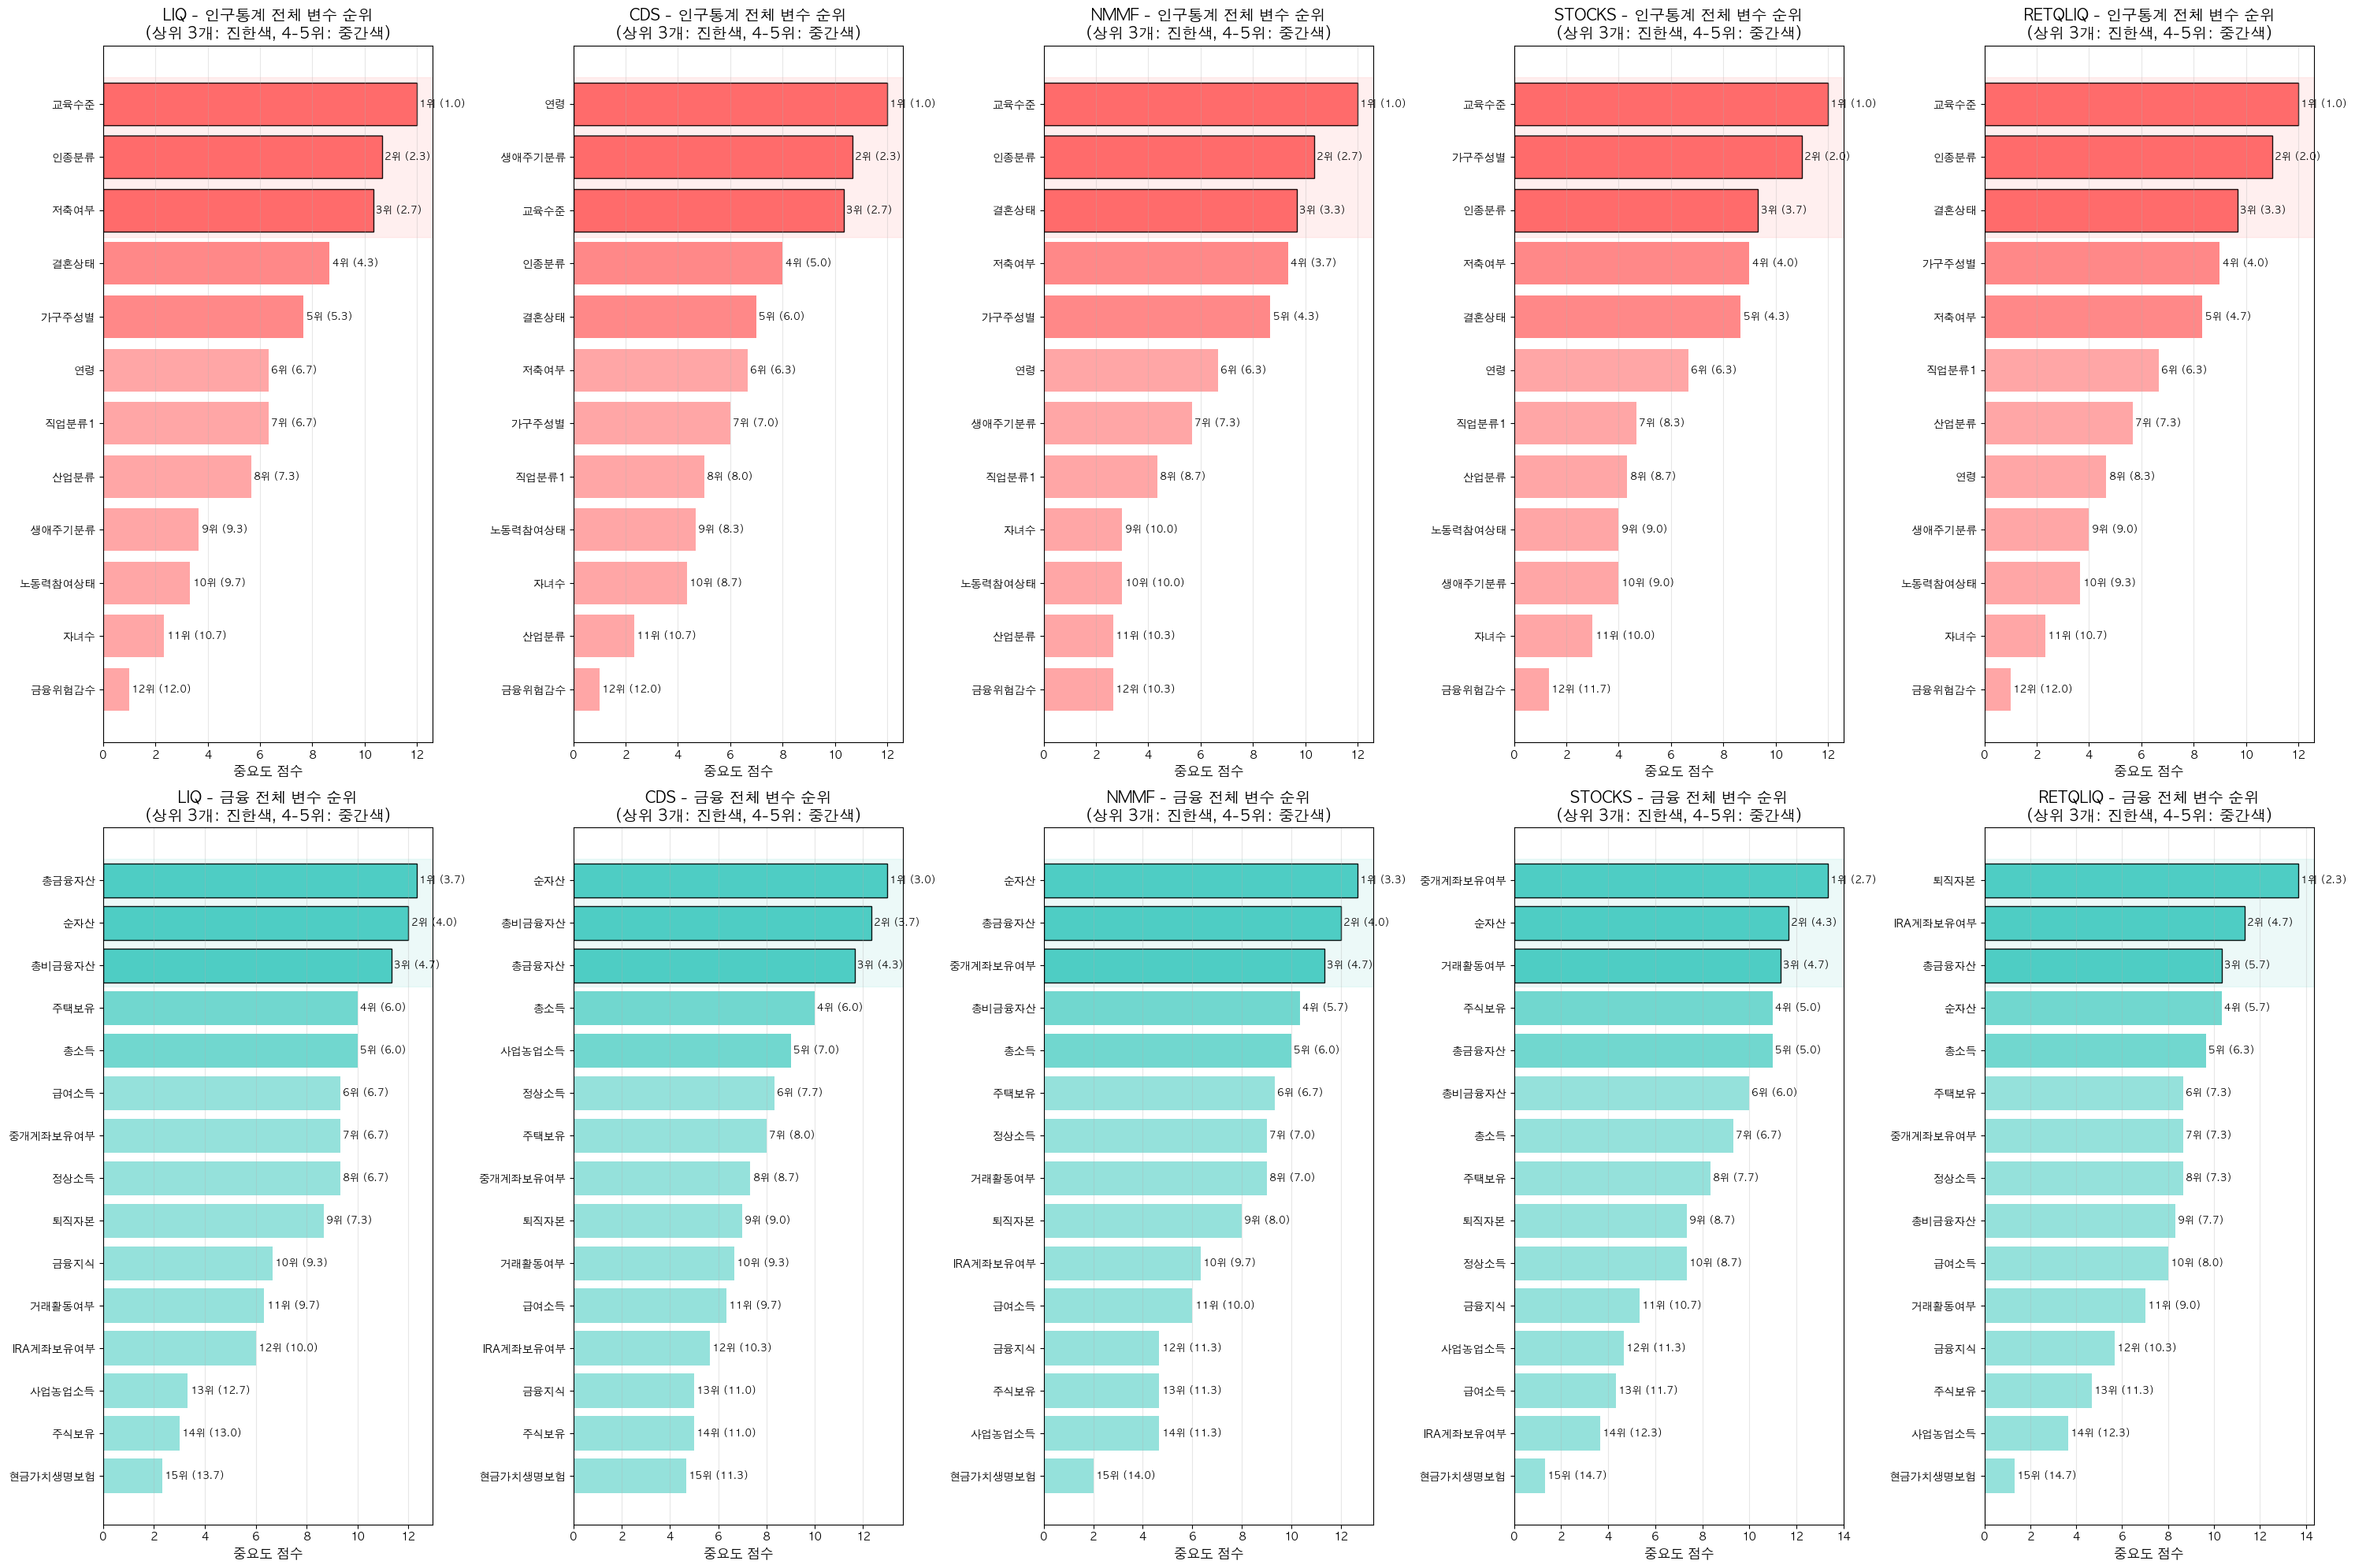


2Ô∏è‚É£ Ï†ÑÏ≤¥ Î≥ÄÏàò ÌûàÌä∏Îßµ ÎπÑÍµê


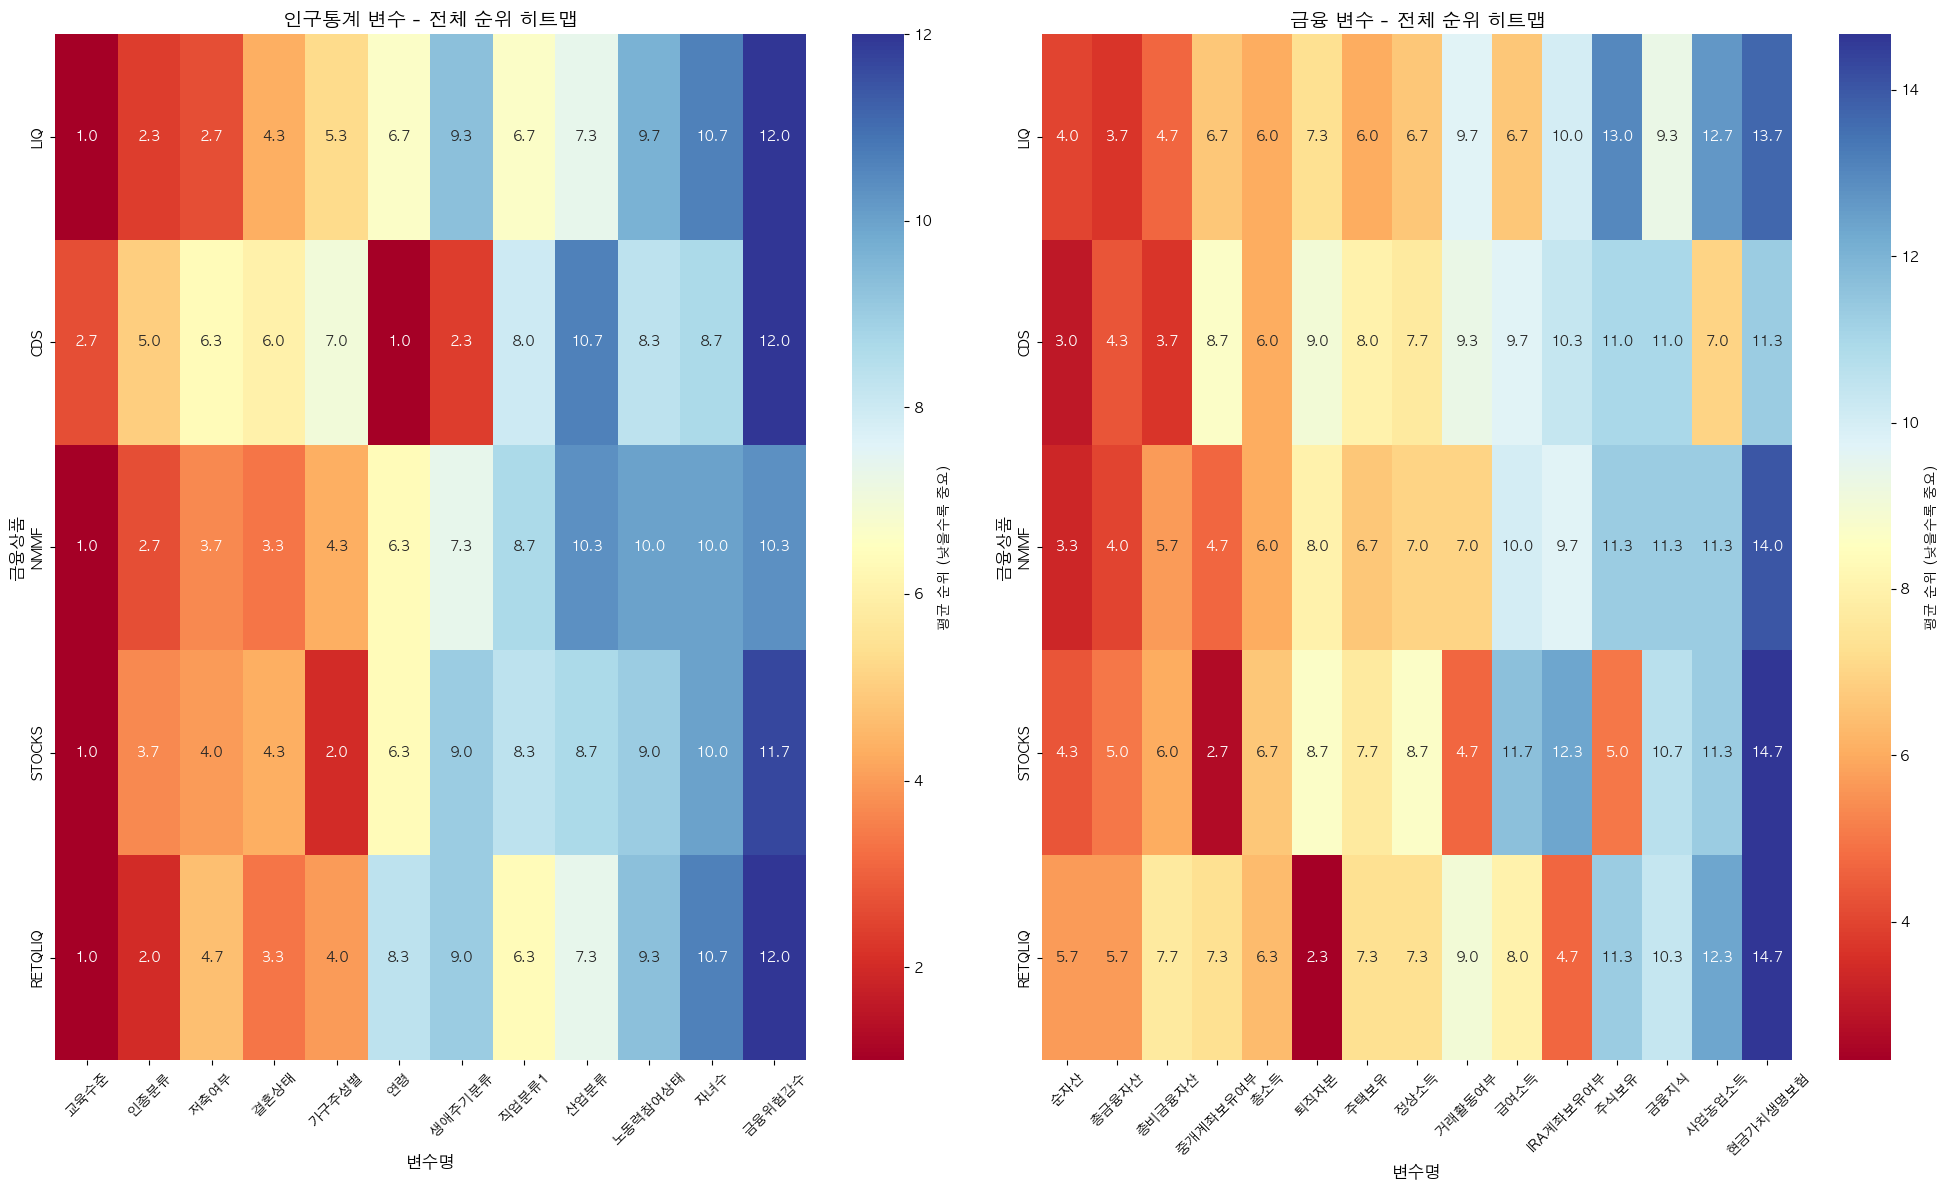


3Ô∏è‚É£ ÏÉÅÏúÑ/ÌïòÏúÑ Î≥ÄÏàò Î∂ÑÏÑù


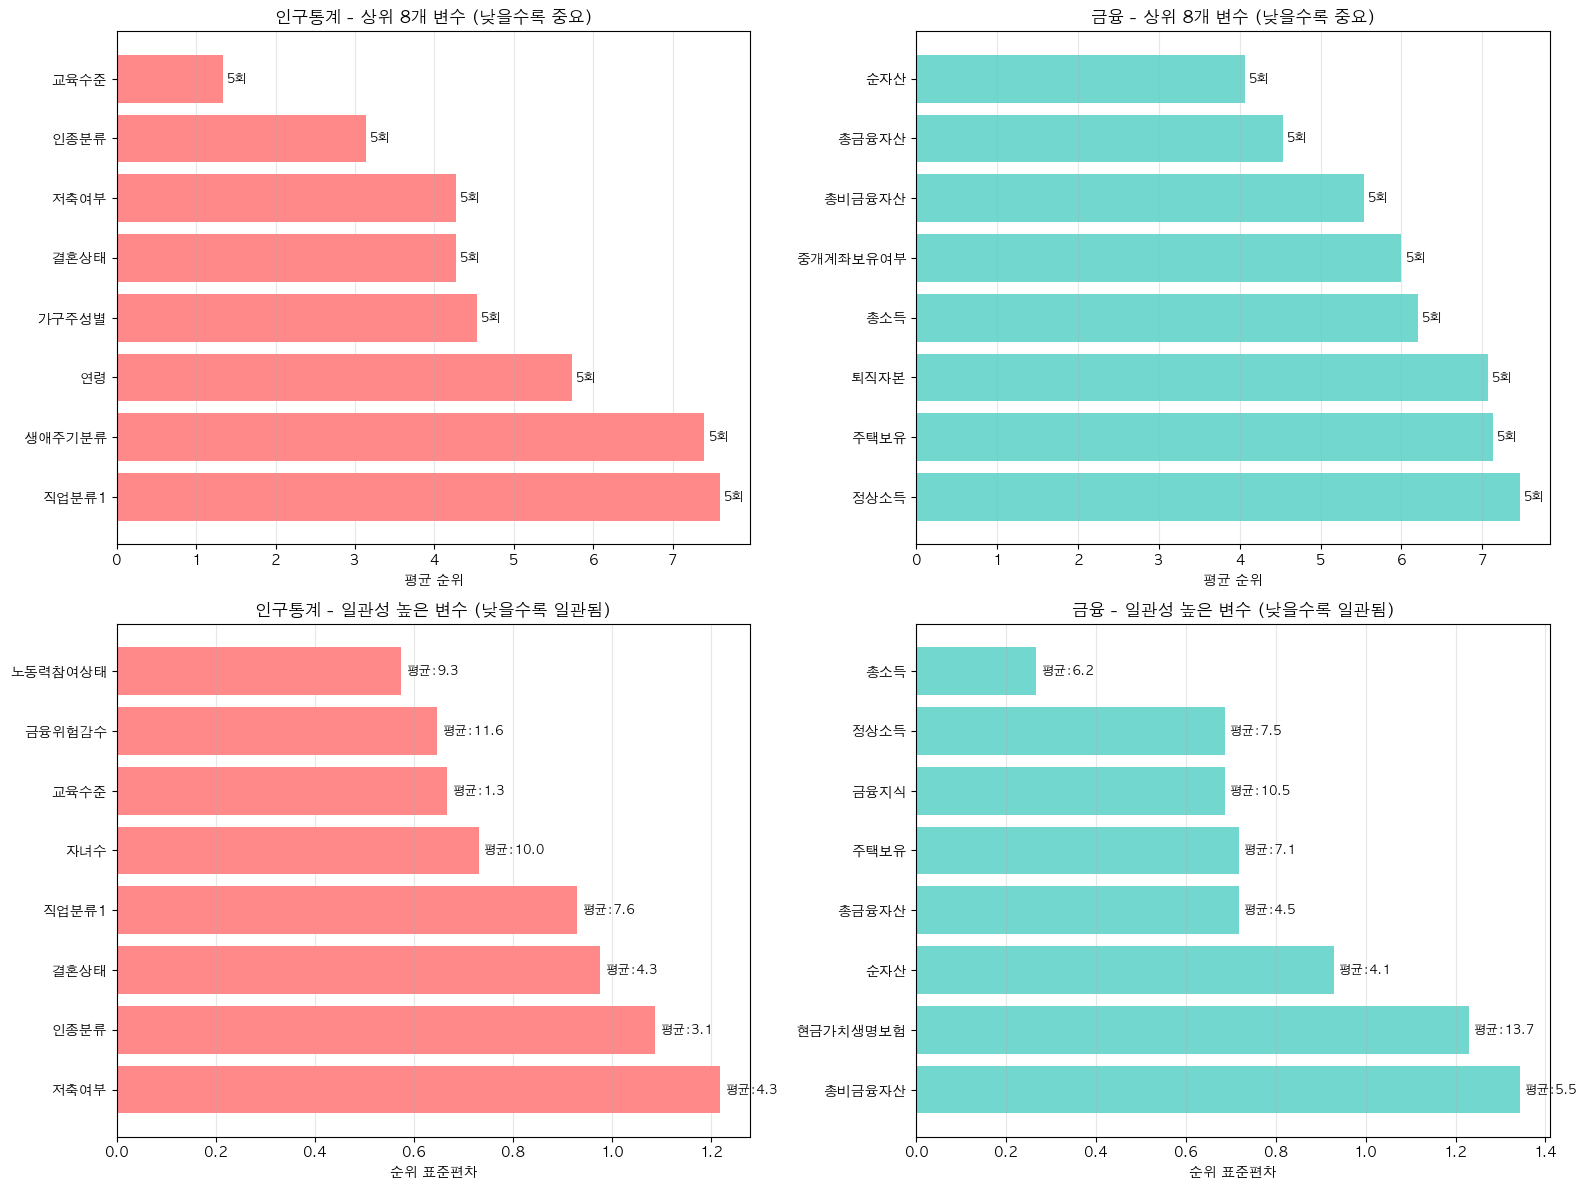


4Ô∏è‚É£ Î≥ÄÏàòÎ≥Ñ ÏùºÍ¥ÄÏÑ± Î∂ÑÏÑù Î∞è Ï¢ÖÌï© ÏàúÏúÑ


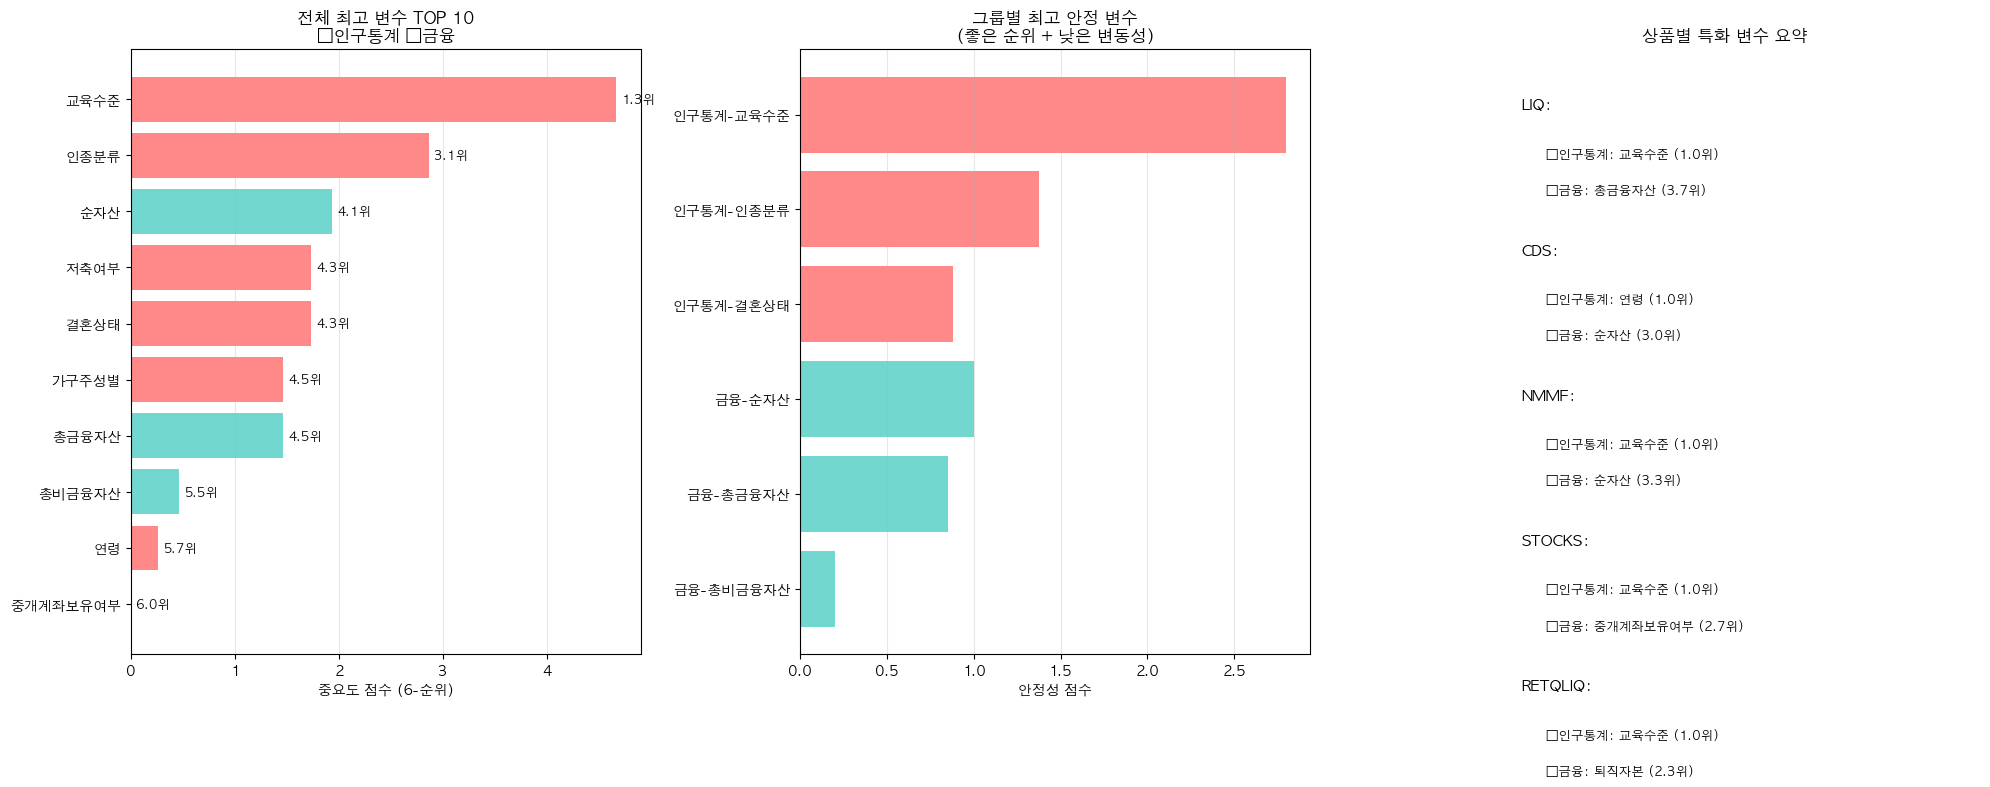


5Ô∏è‚É£ Ï†ÑÏ≤¥ Î≥ÄÏàò ÏöîÏïΩ ÌÜµÍ≥Ñ

üìä ÏÉÅÏúÑ 20Í∞ú Î≥ÄÏàò Ï¢ÖÌï© ÌÜµÍ≥Ñ:
         Î≥ÄÏàòÎ™Ö ÌèâÍ∑†ÏàúÏúÑ ÌèâÍ∑†ÏúÑÏπò ÏµúÍ≥†ÏàúÏúÑ ÏµúÏ†ÄÏàúÏúÑ  ÏùºÍ¥ÄÏÑ±  Îì±Ïû•ÌöüÏàò
   Ïù∏Íµ¨ÌÜµÍ≥Ñ-ÍµêÏú°ÏàòÏ§Ä  1.3  1.4  1.0  2.7 0.67     5
   Ïù∏Íµ¨ÌÜµÍ≥Ñ-Ïù∏Ï¢ÖÎ∂ÑÎ•ò  3.1  2.6  2.0  5.0 1.09     5
      Í∏àÏúµ-ÏàúÏûêÏÇ∞  4.1  2.0  3.0  5.7 0.93     5
   Ïù∏Íµ¨ÌÜµÍ≥Ñ-Ï†ÄÏ∂ïÏó¨Î∂Ä  4.3  4.4  2.7  6.3 1.22     5
   Ïù∏Íµ¨ÌÜµÍ≥Ñ-Í≤∞ÌòºÏÉÅÌÉú  4.3  4.0  3.3  6.0 0.98     5
  Ïù∏Íµ¨ÌÜµÍ≥Ñ-Í∞ÄÍµ¨Ï£ºÏÑ±Î≥Ñ  4.5  4.6  2.0  7.0 1.64     5
    Í∏àÏúµ-Ï¥ùÍ∏àÏúµÏûêÏÇ∞  4.5  2.8  3.7  5.7 0.72     5
   Í∏àÏúµ-Ï¥ùÎπÑÍ∏àÏúµÏûêÏÇ∞  5.5  4.8  3.7  7.7 1.34     5
     Ïù∏Íµ¨ÌÜµÍ≥Ñ-Ïó∞Î†π  5.7  5.4  1.0  8.3 2.48     5
 Í∏àÏúµ-Ï§ëÍ∞úÍ≥ÑÏ¢åÎ≥¥Ïú†Ïó¨Î∂Ä  6.0  5.2  2.7  8.7 2.11     5
      Í∏àÏúµ-Ï¥ùÏÜåÎìù  6.2  5.2  6.0  6.7 0.27     5
     Í∏àÏúµ-Ìá¥ÏßÅÏûêÎ≥∏  7.1  7.4  2.3  9.0 2.43     5
     Í∏àÏúµ-Ï£ºÌÉùÎ≥¥Ïú†  7.1  6.2  6.0  8.0 0.72     5
 Ïù∏Íµ¨ÌÜµÍ≥Ñ-ÏÉùÏï†Ï£ºÍ∏∞Î∂ÑÎ•ò  7.4  7.4  2.3  9.3 2.63     5
  

In [33]:
run_expanded_visualization_all_features(results, targets)